In [8]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
                  array, cumsum, dot, transpose, diagonal, floor
from numpy.linalg import inv, lstsq
import seaborn as sns
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import sklearn
from sklearn.decomposition import PCA
import itertools
import mdtraj as md


In [9]:
pdb='./RegA_DKA_noCorN.pdb'
trajectory='./RegA_DKA_noCorN.xtc'
outdir='./outdir_DKA'
if not os.path.exists('outdir_DKA'):
    os.makedirs('outdir_DKA')
    
print("outdir_DKA:",outdir)
print("pdb:",pdb)
print("trjaectory:",trajectory)

outdir_DKA: ./outdir_DKA
pdb: ./RegA_DKA_noCorN.pdb
trjaectory: ./RegA_DKA_noCorN.xtc


In [10]:
trj = md.load(trajectory, top=pdb,stride=5)
trj.center_coordinates()
top = trj.topology
first_frame = 0
last_frame = trj.n_frames
n_frames=trj.n_frames

In [11]:
nres=[]
for res in trj.topology.residues: nres.append(res.resSeq)
sequence=(' %s' % [residue for residue in trj.topology.residues])
resname=(' %s' % [residue.name for residue in trj.topology.residues])
resindex=(' %s' % [residue.index for residue in trj.topology.residues])
res_num=(' %s' % [residue.resSeq  for residue in trj.topology.residues])



#log = open("/Users/paulrobustelli/Desktop/Sa_calc.log", "w")
print("** SYSTEM INFO **\n")
print("Number of atoms: %d\n" % trj.n_atoms)
print("Number of residues: %d\n" % len(set(nres)))
print("Number of frames: %d\n" % trj.n_frames)
print("Starting frame: %d\n" % first_frame)
print("Last frame: %d\n" % last_frame)
print("sequence: %s\n" % sequence)
print("residue names: %s\n" % resname)
print("residue number: %s\n" % res_num)
print("residue index: %s\n" % resindex)


** SYSTEM INFO **

Number of atoms: 4233

Number of residues: 255

Number of frames: 6000

Starting frame: 0

Last frame: 6000

sequence:  [ASN1, MET2, LEU3, VAL4, LEU5, LYS6, LYS7, ILE8, ARG9, PHE10, TYR11, ASN12, CYS13, ALA14, ILE15, ILE16, HIS17, LEU18, ARG19, ASP20, ALA21, GLN22, LEU23, LEU24, ILE25, ARG26, THR27, LYS28, ASP29, GLY30, GLN31, THR32, LEU33, ASN34, ILE35, PRO36, PRO37, GLU38, SER39, LEU40, CYS41, TYR42, VAL43, GLU44, LYS45, ASN46, THR47, VAL48, MET49, ASP50, VAL51, ALA52, LEU53, LYS54, VAL55, LEU56, GLY57, SER58, GLY59, VAL60, PRO61, TYR62, GLU63, VAL64, TYR65, HIS66, VAL67, ASP68, SER69, ASP70, VAL71, LEU72, ARG73, CYS74, ILE75, CYS76, LYS77, VAL78, MET79, GLU80, PRO81, LEU82, LEU83, LEU84, ASP85, PRO86, GLN87, ARG88, VAL89, ASN90, HIS91, THR92, ARG93, ARG94, LYS95, ILE96, PHE97, THR98, CYS99, ALA100, VAL101, ASP102, GLU103, THR104, ASP105, THR106, ARG107, ILE108, PHE109, LYS110, ARG111, LEU112, THR113, GLY114, SER115, ASN116, VAL117, PRO118, GLN119, HIS120, ARG121, 

In [12]:
residue_num=[]
for res in top.residues: 
    residue_num.append(res.resSeq)
residue_id=np.asarray(residue_num)
residue_id

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

Here I evaluate the secondary structure atributes of RegA with DKA bound.

In [7]:
#Use DSSP to calculate the secondary structure definition
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html
dssp=md.compute_dssp(trj,simplified=True)
dssp

array([['C', 'E', 'E', ..., 'H', 'C', 'NA'],
       ['C', 'C', 'C', ..., 'H', 'C', 'NA'],
       ['C', 'C', 'E', ..., 'C', 'C', 'NA'],
       ...,
       ['C', 'E', 'E', ..., 'C', 'C', 'NA'],
       ['C', 'E', 'E', ..., 'C', 'C', 'NA'],
       ['C', 'E', 'E', ..., 'C', 'C', 'NA']], dtype='<U2')

Helix fractions saved to ./outdir_DKA\RegA_DKA_noCorN_helix_fractions.dat
Sheet fractions saved to ./outdir_DKA\RegA_DKA_noCorN_sheet_fractions.dat


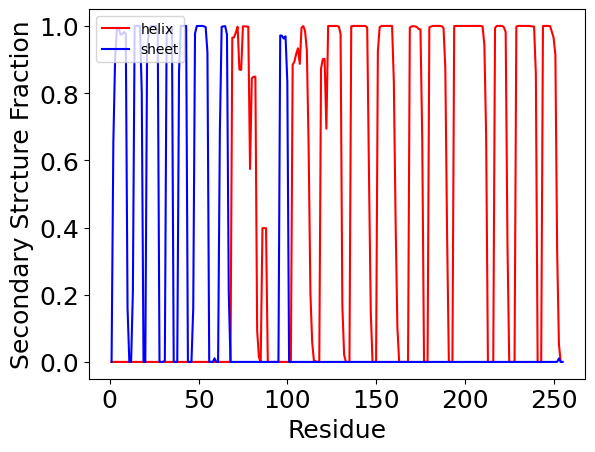

In [12]:
dssp=md.compute_dssp(trj,simplified=True)

def dssp_convert(dssp):
 dsspH=np.copy(dssp)
 dsspE=np.copy(dssp)
 dsspH[dsspH=='H']=1                                                                                      
 dsspH[dsspH=='E']=0                                                                                      
 dsspH[dsspH=='C']=0                                                                                      
 dsspH[dsspH=='NA']=0 
 dsspH=dsspH.astype(int)
 TotalH=np.sum(dsspH,axis=1) 
 Hprop=np.sum(dsspH,axis=0).astype(float)/len(dsspE) 

 dsspE[dsspE=='H']=0
 dsspE[dsspE=='E']=1
 dsspE[dsspE=='C']=0
 dsspE[dsspE=='NA']=0
 dsspE=dsspE.astype(int)
 TotalE=np.sum(dsspE,axis=1) 
 Eprop=np.sum(dsspE,axis=0).astype(float)/len(dsspE) 
 return Hprop, Eprop

Hprop,Eprop=dssp_convert(dssp)
plt.plot(residue_num,Hprop,c='r',label='helix')
plt.plot(residue_num,Eprop,c='b',label='sheet')

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)

# Save helix fractions to a .dat file
helix_data = np.column_stack((residue_num, Hprop))
outfile_helix = os.path.join(outdir, 'RegA_DKA_noCorN_helix_fractions.dat')
np.savetxt(outfile_helix, helix_data, header='Residue HelixFraction', comments='')
print(f"Helix fractions saved to {outfile_helix}")

# Save sheet fractions to a .dat file
sheet_data = np.column_stack((residue_num, Eprop))
outfile_sheet = os.path.join(outdir, 'RegA_DKA_noCorN_sheet_fractions.dat')
np.savetxt(outfile_sheet, sheet_data, header='Residue SheetFraction', comments='')
print(f"Sheet fractions saved to {outfile_sheet}")

SS: H [ 69  70  71  72  75  76  77  78 106 108 109 110 123 124 125 126 127 128
 129 130 136 137 138 139 140 141 142 143 144 145 151 152 153 154 155 156
 157 158 159 169 170 171 172 173 174 175 180 181 182 183 184 185 186 187
 188 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 217 218 219 220 221 222 223 229 230 231 232 233 234 235 236 237 238
 239 244 245 246 247 248 249 250 251]
SS: E [ 3  4  5  6  7  8  9 14 15 16 17 21 22 23 24 25 26 27 32 33 34 35 40 41
 42 43 48 49 50 51 52 53 54 55 63 64 65 66 96 97 98 99]
SS: I []
SS: G []
SS: B []
SS: T [ 28  29  45  46 132 163 164 177 191 225]
SS: S [ 11  12  57  58  59 165 227 241 242]
SS:   [  1  31  36  44  60  68  90  93  94 101 102 118 149 150 166 167 168 179
 192 193 213 216 226 228 243 254]


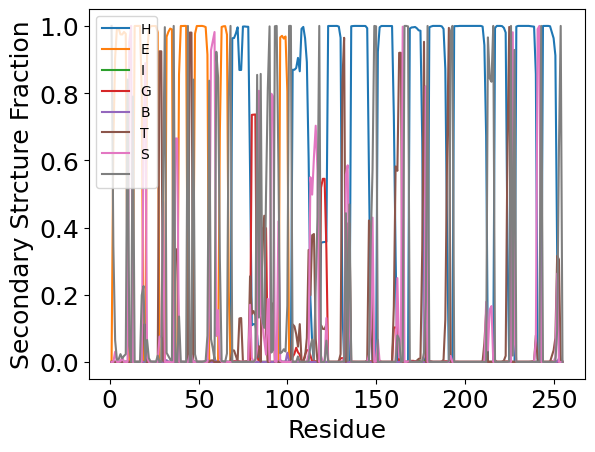

In [9]:
dssp_full=md.compute_dssp(trj,simplified=False)

def dssp_convert_type(dssp,type):
 dsspS=np.copy(dssp)
 dsspS[dsspS!=type]=0                                                                                      
 dsspS[dsspS==type]=1   # you could do this with an if as well                                                                                   
 dsspS=dsspS.astype(int)
 TotalS=np.sum(dsspS,axis=1) 
 Sprop=np.sum(dsspS,axis=0).astype(float)/len(dsspS) 
 return Sprop

for t in ['H','E','I','G','B','T','S',' ']:
  Tprop=dssp_convert_type(dssp_full,t)
  plt.plot(residue_num,Tprop,label=t)
  print("SS:",t,np.asarray(residue_num)[np.where(Tprop>.90)])

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)


SS: H [ 69  70  71  72  75  76  77  78 106 108 109 110 123 124 125 126 127 128
 129 130 136 137 138 139 140 141 142 143 144 145 151 152 153 154 155 156
 157 158 159 169 170 171 172 173 174 175 180 181 182 183 184 185 186 187
 188 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 217 218 219 220 221 222 223 229 230 231 232 233 234 235 236 237 238
 239 244 245 246 247 248 249 250 251]
SS: E [ 3  4  5  6  7  8  9 14 15 16 17 21 22 23 24 25 26 27 32 33 34 35 40 41
 42 43 48 49 50 51 52 53 54 55 63 64 65 66 96 97 98 99]
SS: I []
SS: G []
SS: B []
SS: T [ 28  29  45  46 132 163 164 177 191 225]
SS: S [ 11  12  57  58  59 165 227 241 242]
SS:   [  1  31  36  44  60  68  90  93  94 101 102 118 149 150 166 167 168 179
 192 193 213 216 226 228 243 254]


(1.0, 149.0)

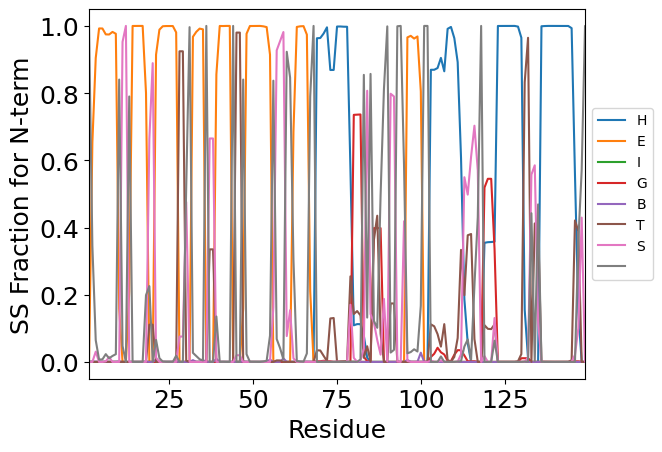

In [18]:
#Zoom in on the N-terminal domain
for t in ['H','E','I','G','B','T','S',' ']:
  Tprop=dssp_convert_type(dssp_full,t)
  plt.plot(residue_num,Tprop,label=t)
  print("SS:",t,np.asarray(residue_num)[np.where(Tprop>.90)])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Residue', size=18)
plt.ylabel('SS Fraction for N-term', size=18)
plt.tick_params(labelsize=18)
plt.xlim(1,149)

SS: H [ 69  70  71  72  75  76  77  78 106 108 109 110 123 124 125 126 127 128
 129 130 136 137 138 139 140 141 142 143 144 145 151 152 153 154 155 156
 157 158 159 169 170 171 172 173 174 175 180 181 182 183 184 185 186 187
 188 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 217 218 219 220 221 222 223 229 230 231 232 233 234 235 236 237 238
 239 244 245 246 247 248 249 250 251]
SS: E [ 3  4  5  6  7  8  9 14 15 16 17 21 22 23 24 25 26 27 32 33 34 35 40 41
 42 43 48 49 50 51 52 53 54 55 63 64 65 66 96 97 98 99]
SS: I []
SS: G []
SS: B []
SS: T [ 28  29  45  46 132 163 164 177 191 225]
SS: S [ 11  12  57  58  59 165 227 241 242]
SS:   [  1  31  36  44  60  68  90  93  94 101 102 118 149 150 166 167 168 179
 192 193 213 216 226 228 243 254]


(150.0, 257.0)

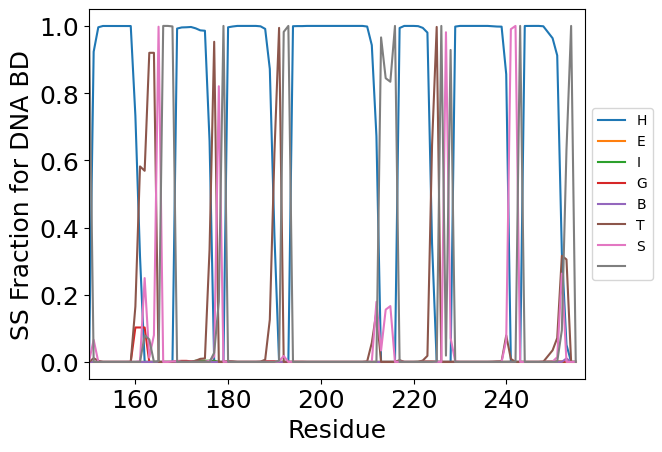

In [17]:
#Zoom in on the DNA binding domain
for t in ['H','E','I','G','B','T','S',' ']:
  Tprop=dssp_convert_type(dssp_full,t)
  plt.plot(residue_num,Tprop,label=t)
  print("SS:",t,np.asarray(residue_num)[np.where(Tprop>.90)])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Residue', size=18)
plt.ylabel('SS Fraction for DNA BD', size=18)
plt.tick_params(labelsize=18)
plt.xlim(150,257)

In [19]:
#Here is a calculator to help my brain
def correct_residue_numbers(actual_residue_nums):
    # Adjust each residue number in the list by subtracting 22
    adjusted_residue_nums = [num - 22 for num in actual_residue_nums]
    
    # Check if any adjusted residue number is invalid
    for num in adjusted_residue_nums:
        if num < 0:
            raise ValueError(f"The adjusted residue number {num + 22} is out of bounds.")
    
    return adjusted_residue_nums
#Here I am inputing residues that are either known to be important for inhibition or are hypothesized to be. 
actual_residue_nums = [24, 26, 29, 32, 87, 149, 188, 222, 223]
residue_indices = correct_residue_numbers(actual_residue_nums)
print(f"The indices for the actual residue numbers {actual_residue_nums} are {residue_indices}.")

The indices for the actual residue numbers [24, 26, 29, 32, 87, 149, 188, 222, 223] are [2, 4, 7, 10, 65, 127, 166, 200, 201].


In [13]:
indices_phi, phis = md.compute_phi(trj)
indices_psi, psis = md.compute_psi(trj)
indices_chi1, chi1s = md.compute_chi1(trj)
indices_chi2, chi2s = md.compute_chi2(trj)

In [14]:
phi_dict={}
dihedral_dict = { 'phi': { },
          'psi': { },
          'chi1': { },
          'chi2': { }}

for i in range(0,len(indices_phi)):
  indices=indices_phi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['phi'][resnum]=phis[:,i]

for i in range(0,len(indices_psi)):
  indices=indices_psi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['psi'][resnum]=psis[:,i]

for i in range(0,len(indices_chi1)):
  indices=indices_chi1[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi1'][resnum]=chi1s[:,i]

for i in range(0,len(indices_chi2)):
  indices=indices_chi2[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi2'][resnum]=chi2s[:,i]

In [15]:
def plot_phipsi(res):
 plt.hist2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.tick_params(labelsize=18)
 plt.show()
 return

def plot_chi(res):
    if res in dihedral_dict['chi1']:
     plt.hist(dihedral_dict['chi1'][res],bins=36,range=[-3.14,3.14])        
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('counts', size=18)
     plt.tick_params(labelsize=18)
     plt.show()
     plt.clf()   
    if res in dihedral_dict['chi2']:
     plt.hist2d(dihedral_dict['chi1'][res],dihedral_dict['chi2'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('$\chi_2$', size=18)
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.tick_params(labelsize=18)
     plt.show()
    return

In [16]:
res_interest_idx= [2, 4, 7, 10, 65, 127, 166, 200, 201, 254]
def print_residue_info(trj, indices):
    for idx in indices:
        residue = trj.topology.residue(idx)
        print(f"Residue {residue.index + 1}: {residue.name} (resSeq {residue.resSeq})")

print_residue_info(trj, res_interest_idx)

Residue 3: LEU (resSeq 3)
Residue 5: LEU (resSeq 5)
Residue 8: ILE (resSeq 8)
Residue 11: TYR (resSeq 11)
Residue 66: HIS (resSeq 66)
Residue 128: TYR (resSeq 128)
Residue 167: TRP (resSeq 167)
Residue 201: ILE (resSeq 201)
Residue 202: ARG (resSeq 202)
Residue 255: LIG (resSeq 255)


Residue 3


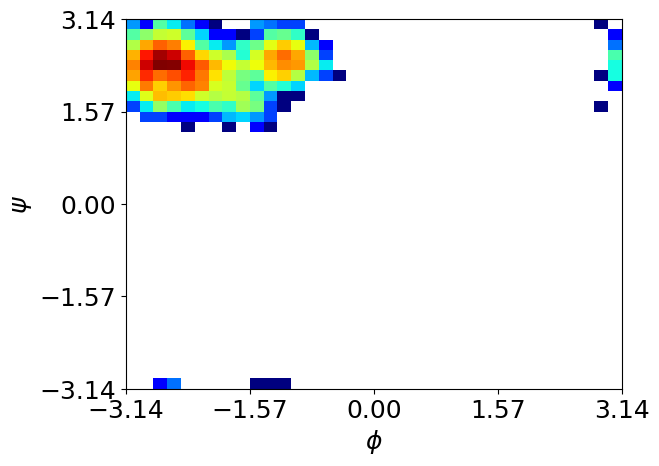

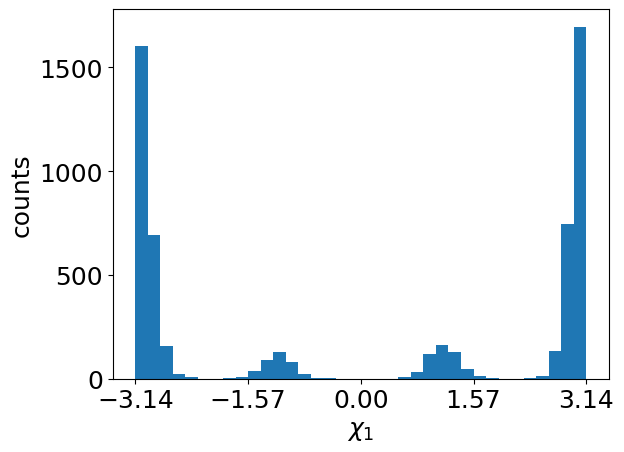

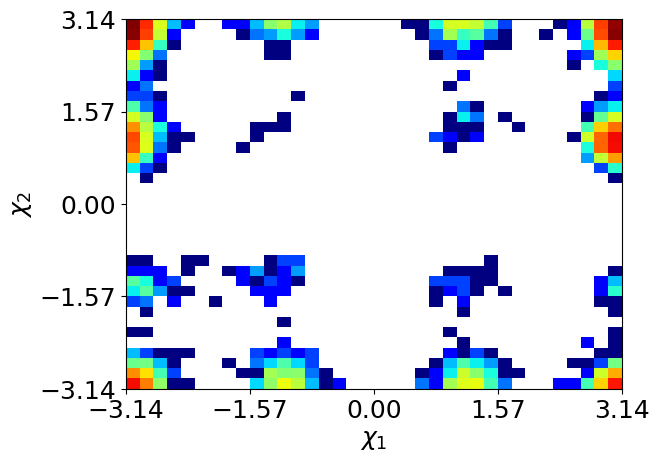

Residue 5


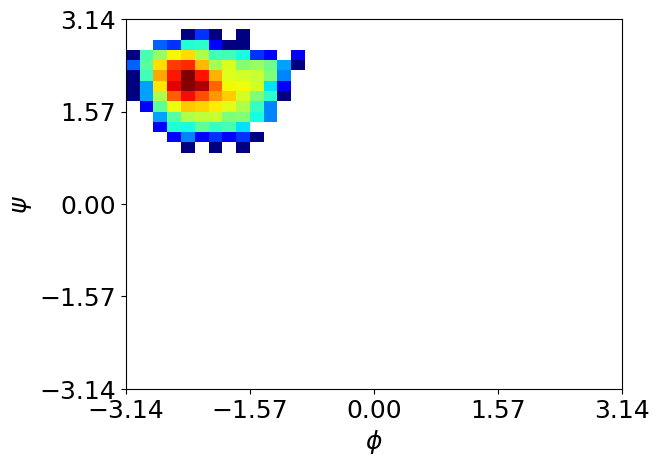

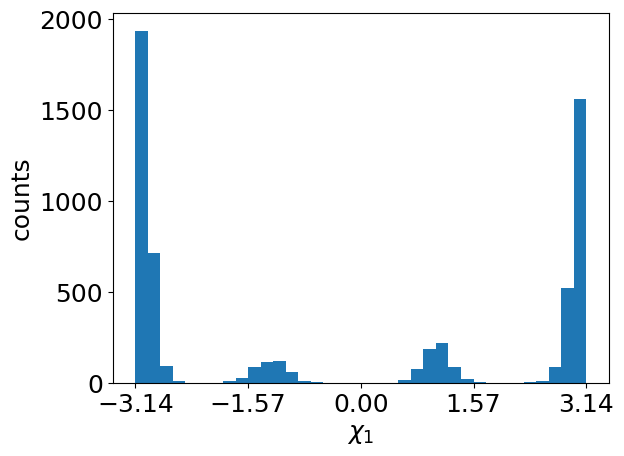

Residue 8


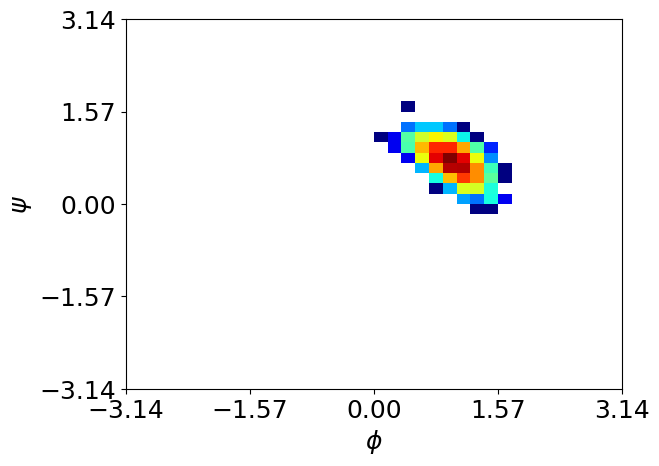

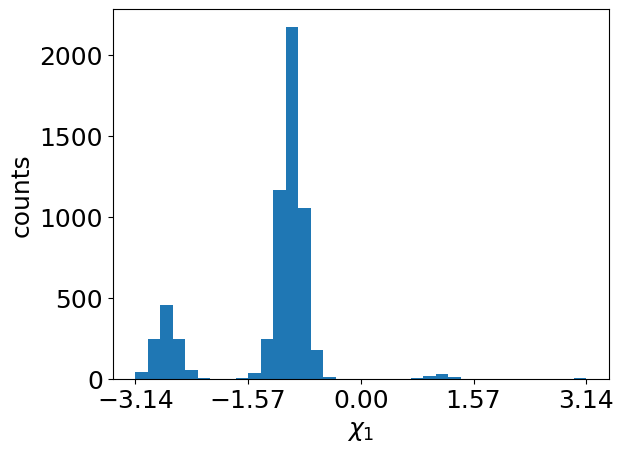

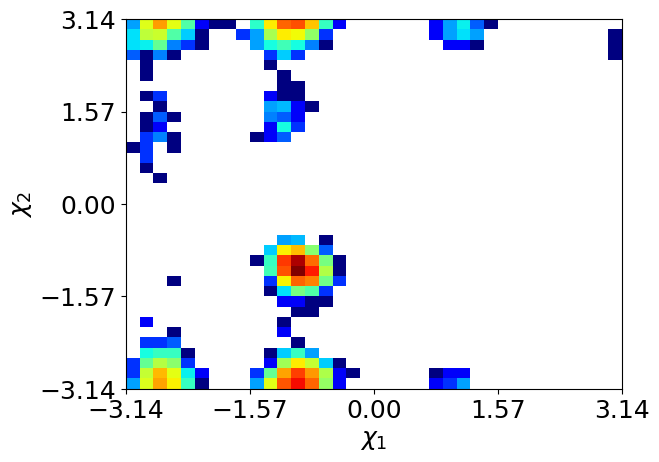

Residue 11


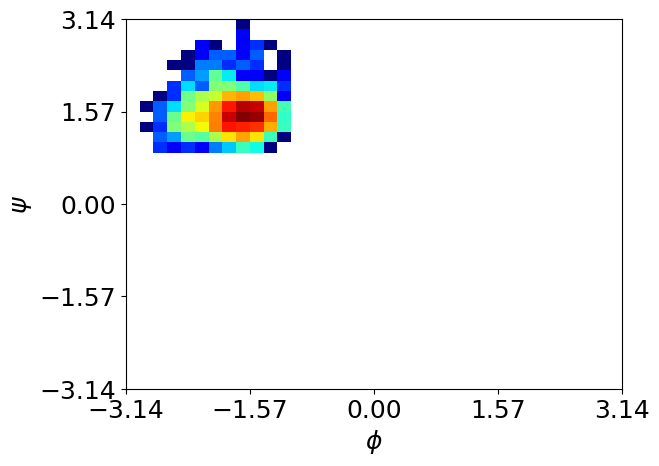

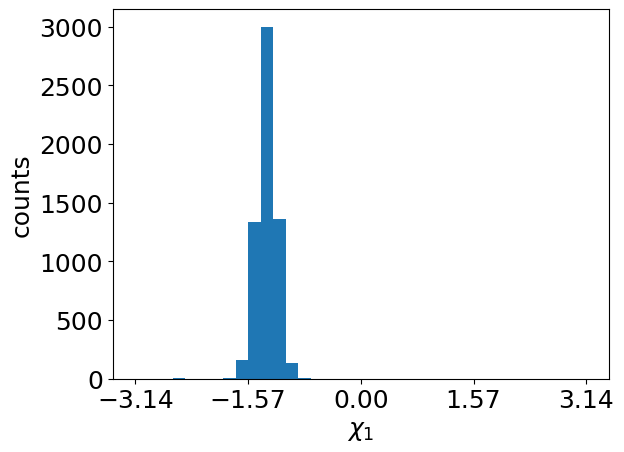

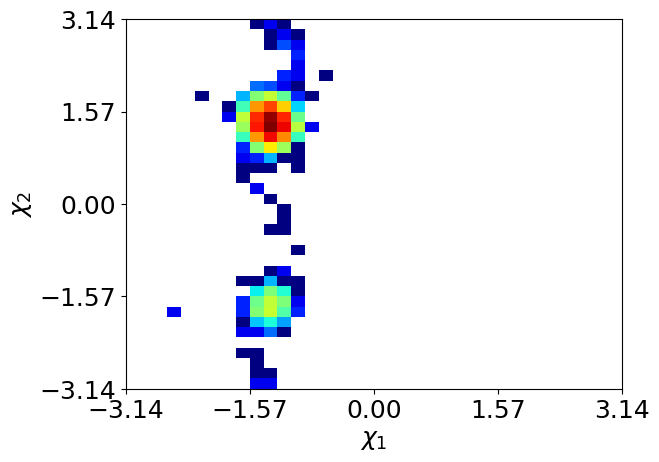

Residue 66


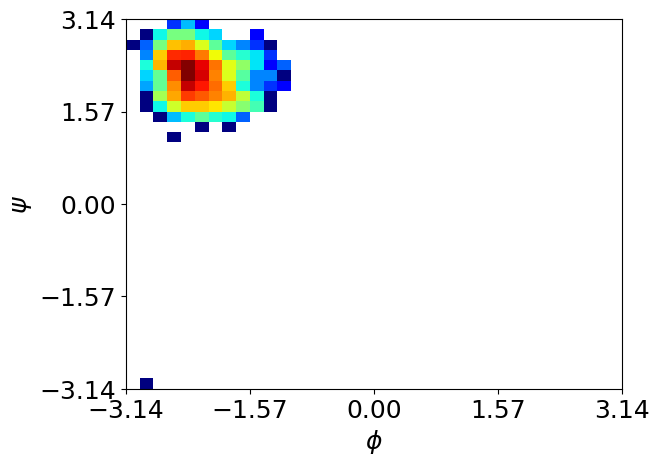

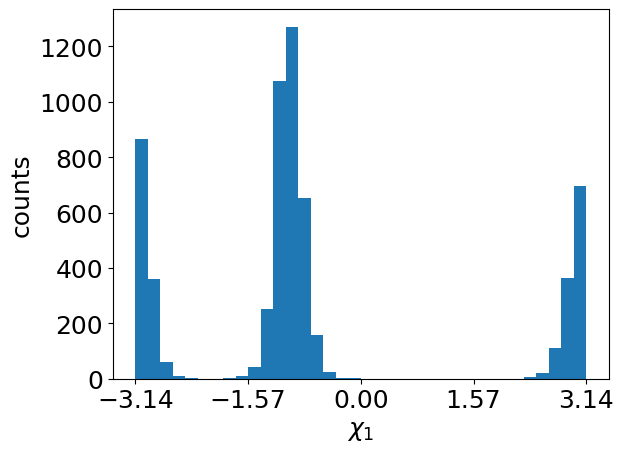

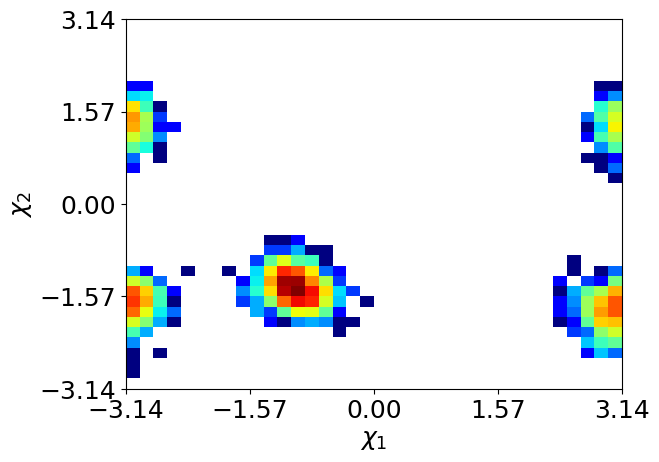

Residue 128


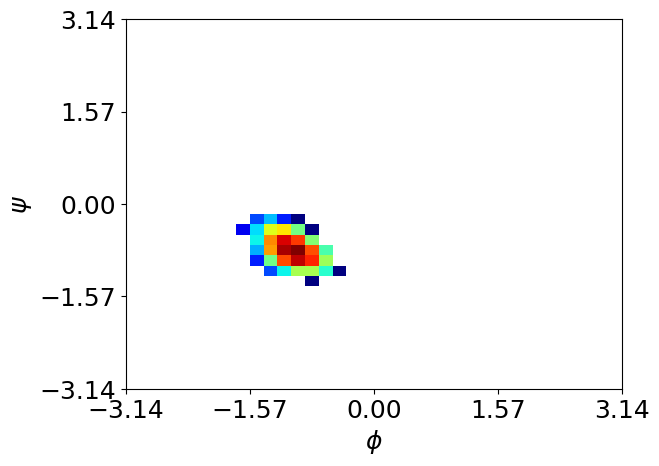

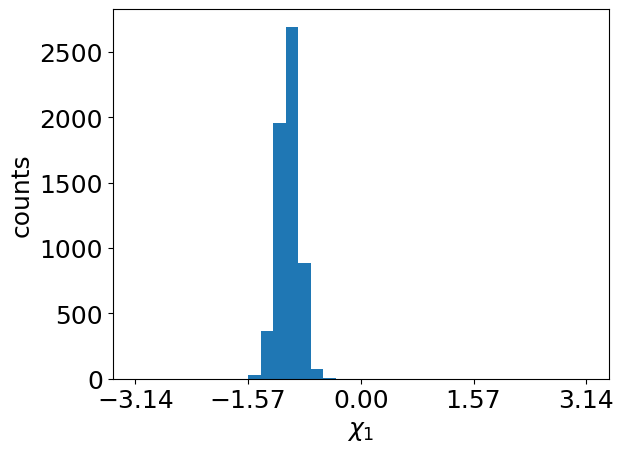

Residue 167


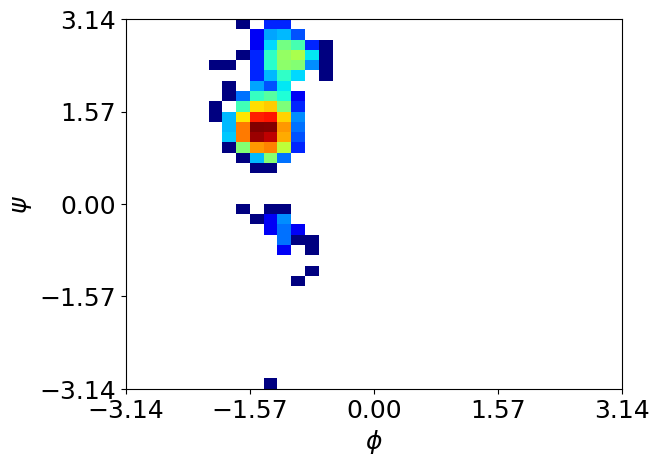

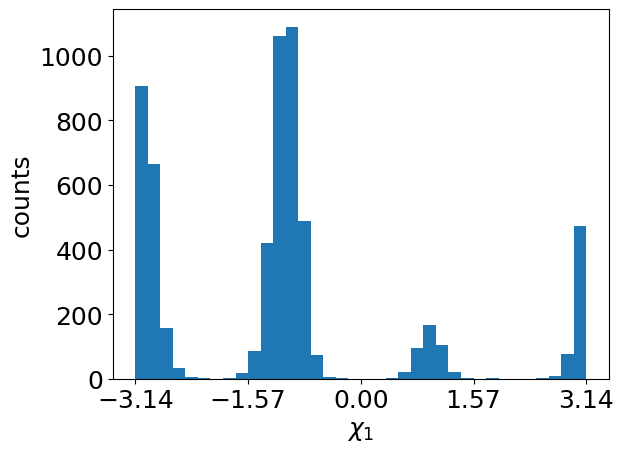

Residue 201


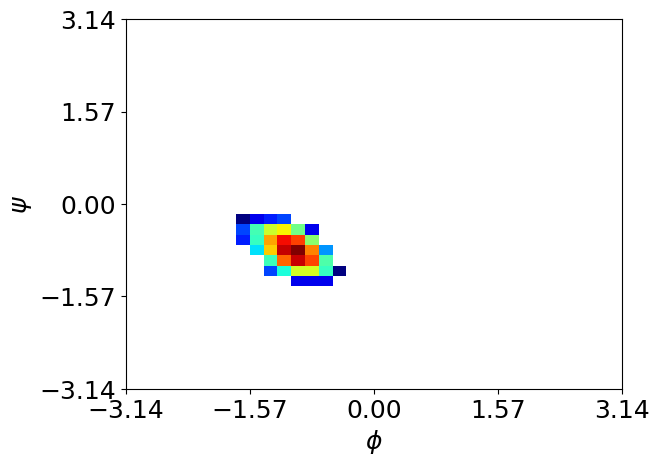

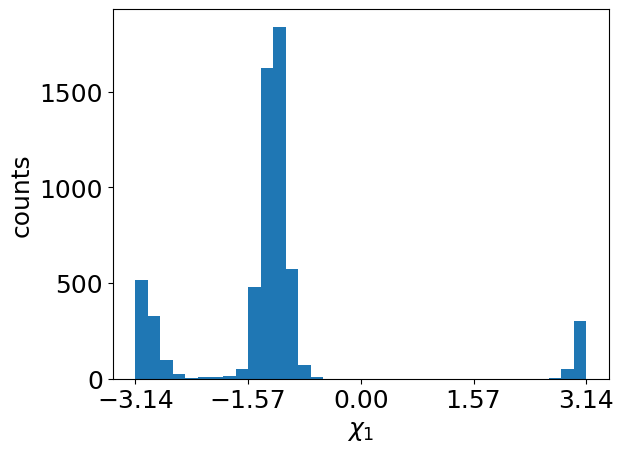

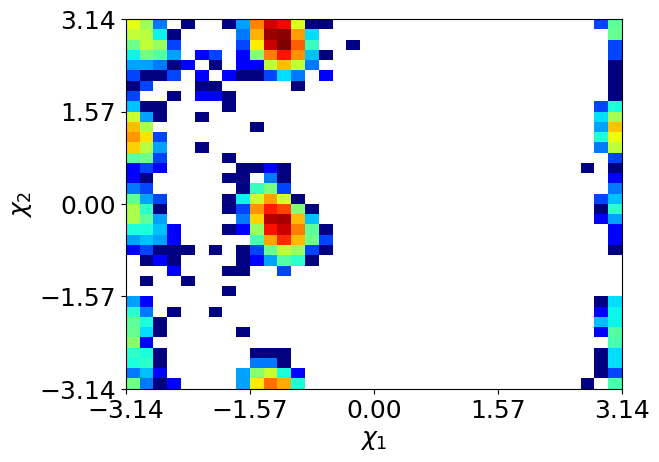

Residue 202


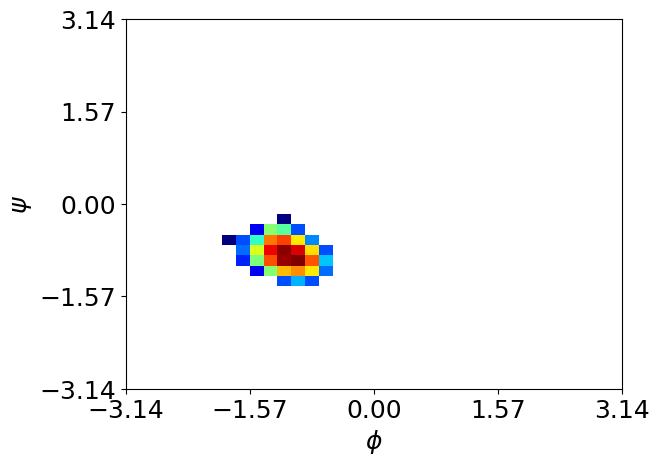

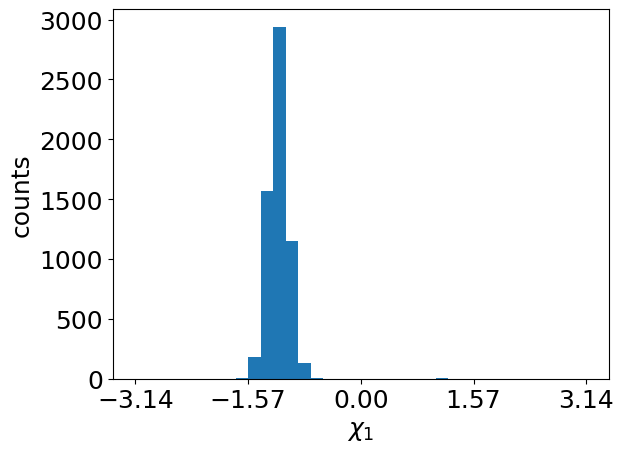

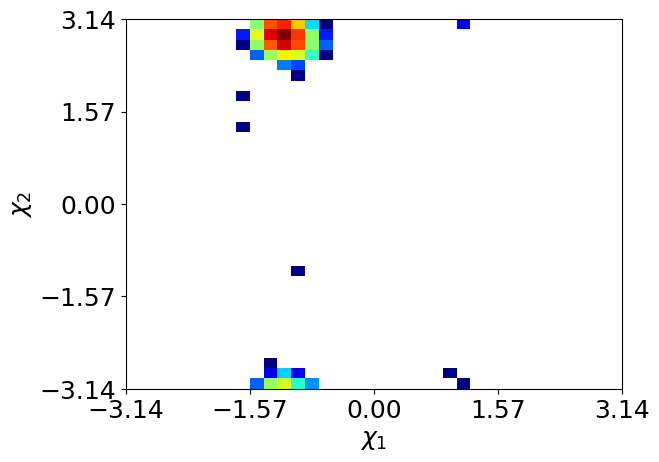

<Figure size 640x480 with 0 Axes>

In [17]:
res_interest= [2, 4, 7, 10, 65, 127, 166, 200, 201]
for i in res_interest:
    print("Residue", i+1)
    plot_phipsi(i)
    plt.clf()
    plot_chi(i)
    plt.clf()
#res 11 is different from apo

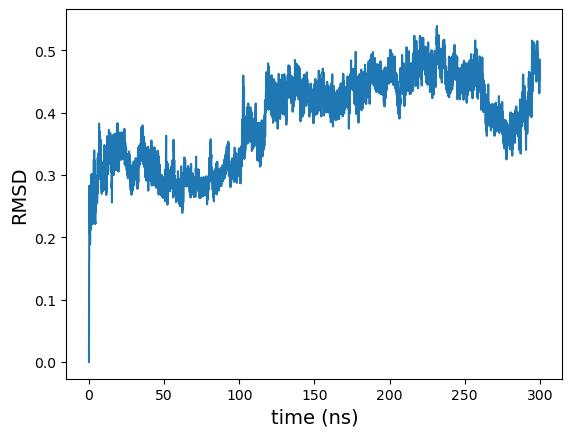

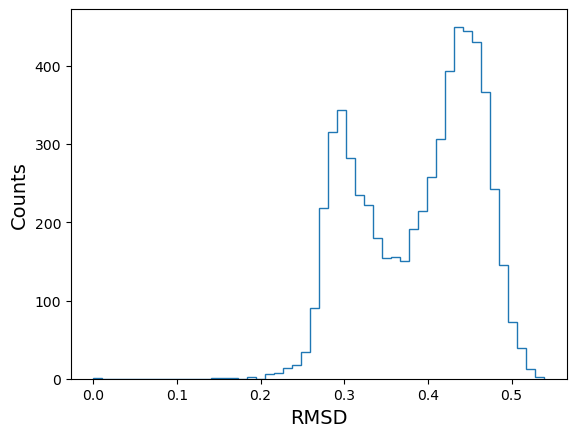

In [18]:
#Calculate RMSD
time=np.linspace(0,300,trj.n_frames)
rmsd = md.rmsd(trj, trj, 0)
plt.plot(time,rmsd)
plt.ylabel('RMSD',size=14);
plt.xlabel('time (ns)',size=14)
plt.show()
plt.clf()

plt.hist(rmsd,histtype='step',bins=50)
plt.ylabel('Counts',size=14);
plt.xlabel('RMSD',size=14)
plt.show()
# Combine time and rmsd into a single array for saving
data = np.column_stack((time, rmsd))

# Save the data to a .dat file
outfile = os.path.join(outdir, 'RegA_DKA_noCorN_rmsd_data.dat')
np.savetxt(outfile, data, header='time(ns) rmsd', comments='')

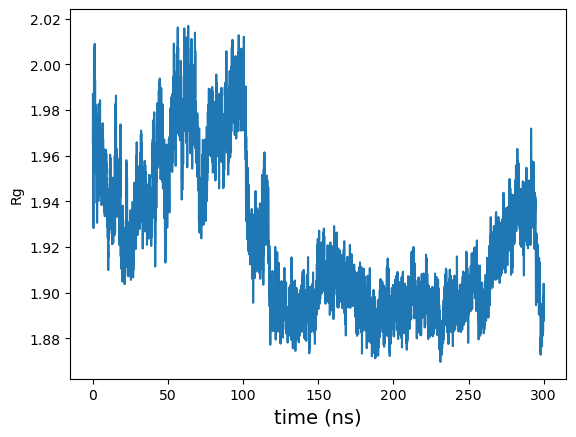

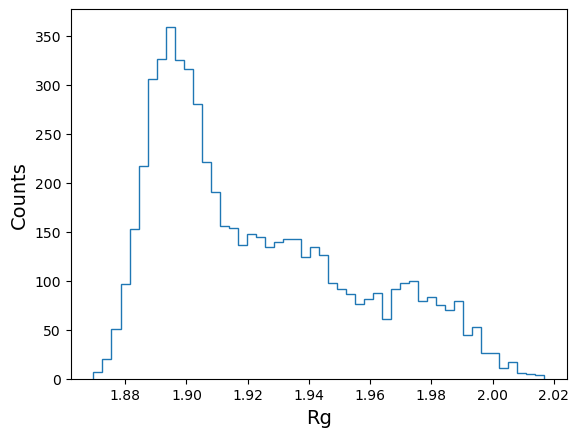

Time series data saved to ./outdir_DKA\RegA_DKA_noCorN_time_series_Rg.dat


In [19]:
#Calculate the radius of gyration and make a histogram
rg=md.compute_rg(trj, masses=None) 
plt.plot(time,rg)
plt.ylabel('Rg');
plt.xlabel('time (ns)',size=14)
plt.show()
plt.clf()

plt.hist(rg,histtype='step',bins=50)
plt.ylabel('Counts',size=14);
plt.xlabel('Rg',size=14)
plt.show()
# Combine time and rg into a single array for saving
data = np.column_stack((time, rg))

# Save the data to a .dat file in the output directory
outfile_time_series = os.path.join(outdir, 'RegA_DKA_noCorN_time_series_Rg.dat')
np.savetxt(outfile_time_series, data, header='time(ns) Rg', comments='')
print(f"Time series data saved to {outfile_time_series}")

In [6]:
#Identify subtantially populated hydrogen bonds
hbonds = md.baker_hubbard(trj, periodic=False)
label = lambda hbond : '%s -- %s' % (trj.topology.atom(hbond[0]), trj.topology.atom(hbond[2]))
for hbond in hbonds:
    print(label(hbond))
#donor on left, acceptor on the right, looks at angles to see if acceptable H bond is available there

LEU3-N -- LEU53-O
VAL4-N -- PHE240-O
LEU5-N -- VAL51-O
LYS6-N -- GLU238-O
LYS6-N -- PHE239-O
LYS7-N -- ASP50-OD1
LYS7-N -- ASP50-OD2
LYS7-NZ -- ASP50-OD1
LYS7-NZ -- ASP50-OD2
LYS7-NZ -- ASP50-OD1
LYS7-NZ -- ASP50-OD2
LYS7-NZ -- ASP50-OD1
LYS7-NZ -- ASP50-OD2
ILE8-N -- MET49-O
ARG9-NE -- ASP200-OD1
ARG9-NE -- ASP200-OD2
ARG9-NH1 -- SER191-O
ARG9-NH1 -- ASN192-OD1
ARG9-NH2 -- ASP200-OD1
ARG9-NH2 -- ASP200-OD2
ARG9-NH2 -- GLU190-O
ARG9-NH2 -- SER191-O
ARG9-NH2 -- ASN192-OD1
PHE10-N -- THR47-O
TYR11-N -- ARG9-O
ASN12-ND2 -- GLU153-OE1
ASN12-ND2 -- GLU153-OE2
ASN12-ND2 -- VAL67-O
ALA14-N -- VAL43-O
ILE15-N -- TYR65-O
ILE16-N -- CYS41-O
HIS17-N -- GLU63-O
HIS17-NE2 -- GLU38-O
LEU18-N -- SER39-O
ARG19-N -- HIS17-O
ARG19-N -- PRO61-O
ARG19-NE -- GLU38-OE1
ARG19-NE -- GLU38-OE2
ARG19-NH1 -- GLU38-OE1
ARG19-NH1 -- GLU103-OE1
ARG19-NH2 -- GLU38-OE1
ARG19-NH2 -- GLU38-OE2
ARG19-NH2 -- GLU103-OE1
ARG19-NH2 -- GLU103-OE2
ASP20-N -- VAL60-O
ASP20-N -- PRO61-O
ALA21-N -- ARG19-O
GLN22-N -- LYS54-O
GLN

In [7]:
hbonds_protein = md.baker_hubbard(trj.atom_slice(trj.topology.select("protein")), periodic=False)
label = lambda hbond : '%s -- %s' % (trj.topology.atom(hbond[0]), trj.topology.atom(hbond[2]))
for hbond in hbonds_protein:
    print(label(hbond))
#donor on left, acceptor

LEU3-N -- LEU53-O
VAL4-N -- PHE240-O
LEU5-N -- VAL51-O
LYS6-N -- GLU238-O
LYS6-N -- PHE239-O
LYS7-N -- ASP50-OD1
LYS7-N -- ASP50-OD2
LYS7-NZ -- ASP50-OD1
LYS7-NZ -- ASP50-OD2
LYS7-NZ -- ASP50-OD1
LYS7-NZ -- ASP50-OD2
LYS7-NZ -- ASP50-OD1
LYS7-NZ -- ASP50-OD2
ILE8-N -- MET49-O
ARG9-NE -- ASP200-OD1
ARG9-NE -- ASP200-OD2
ARG9-NH1 -- SER191-O
ARG9-NH1 -- ASN192-OD1
ARG9-NH2 -- ASP200-OD1
ARG9-NH2 -- ASP200-OD2
ARG9-NH2 -- GLU190-O
ARG9-NH2 -- SER191-O
ARG9-NH2 -- ASN192-OD1
PHE10-N -- THR47-O
TYR11-N -- ARG9-O
ASN12-ND2 -- GLU153-OE1
ASN12-ND2 -- GLU153-OE2
ASN12-ND2 -- VAL67-O
ALA14-N -- VAL43-O
ILE15-N -- TYR65-O
ILE16-N -- CYS41-O
HIS17-N -- GLU63-O
HIS17-NE2 -- GLU38-O
LEU18-N -- SER39-O
ARG19-N -- HIS17-O
ARG19-N -- PRO61-O
ARG19-NE -- GLU38-OE1
ARG19-NE -- GLU38-OE2
ARG19-NH1 -- GLU38-OE1
ARG19-NH1 -- GLU103-OE1
ARG19-NH2 -- GLU38-OE1
ARG19-NH2 -- GLU38-OE2
ARG19-NH2 -- GLU103-OE1
ARG19-NH2 -- GLU103-OE2
ASP20-N -- VAL60-O
ASP20-N -- PRO61-O
ALA21-N -- ARG19-O
GLN22-N -- LYS54-O
GLN

In [31]:
for hbond in hbonds:
 donor = top.atom(hbond[0])
 acc = top.atom(hbond[2])
 print(hbond,donor,acc)

[ 33  34 881] LEU3-N LEU53-O
[  52   53 3957] VAL4-N PHE240-O
[ 68  69 852] LEU5-N VAL51-O
[  87   88 3917] LYS6-N GLU238-O
[  87   88 3937] LYS6-N PHE239-O
[109 110 833] LYS7-N ASP50-OD1
[109 110 834] LYS7-N ASP50-OD2
[125 126 833] LYS7-NZ ASP50-OD1
[125 126 834] LYS7-NZ ASP50-OD2
[125 127 833] LYS7-NZ ASP50-OD1
[125 127 834] LYS7-NZ ASP50-OD2
[125 128 833] LYS7-NZ ASP50-OD1
[125 128 834] LYS7-NZ ASP50-OD2
[131 132 824] ILE8-N MET49-O
[ 163  164 3295] ARG9-NE ASP200-OD1
[ 163  164 3296] ARG9-NE ASP200-OD2
[ 166  168 3160] ARG9-NH1 SER191-O
[ 166  168 3169] ARG9-NH1 ASN192-OD1
[ 169  170 3295] ARG9-NH2 ASP200-OD1
[ 169  170 3296] ARG9-NH2 ASP200-OD2
[ 169  171 3149] ARG9-NH2 GLU190-O
[ 169  171 3160] ARG9-NH2 SER191-O
[ 169  171 3169] ARG9-NH2 ASN192-OD1
[174 175 791] PHE10-N THR47-O
[194 195 173] TYR11-N ARG9-O
[ 224  225 2506] ASN12-ND2 GLU153-OE1
[ 224  225 2507] ASN12-ND2 GLU153-OE2
[ 224  226 1099] ASN12-ND2 VAL67-O
[240 241 726] ALA14-N VAL43-O
[ 250  251 1066] ILE15-N TYR65-O
[2

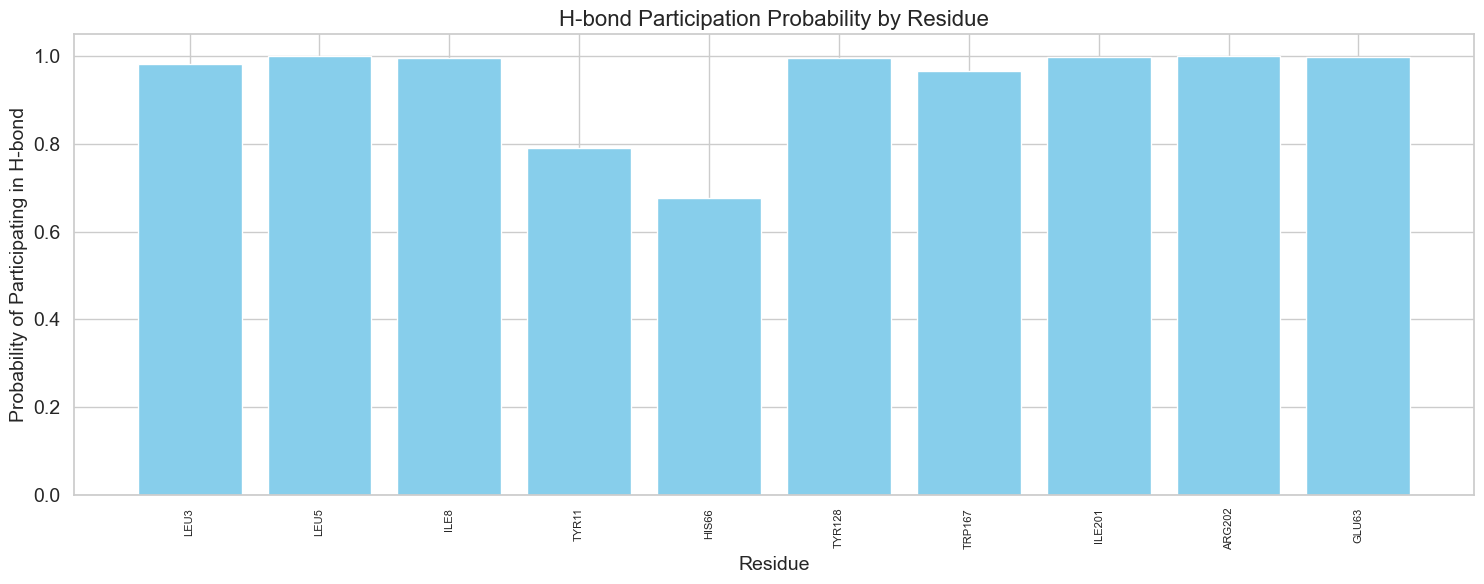

In [50]:
# this is with ligand hbonds
# Define residues of interest
residues_of_interest = [2, 4, 7, 10, 65, 127, 166, 200, 201, 62]

# Initialize a dictionary to track H-bond participation for residues of interest
hbond_participation = {res: np.zeros(trj.n_frames) for res in residues_of_interest}

# Iterate over each frame
for frame in range(trj.n_frames):
    hbonds_frame = md.baker_hubbard(trj[frame], periodic=False)
    for hbond in hbonds_frame:
        donor_residue = trj.topology.atom(hbond[0]).residue.index
        acceptor_residue = trj.topology.atom(hbond[2]).residue.index
        if donor_residue in residues_of_interest:
            hbond_participation[donor_residue][frame] = 1
        if acceptor_residue in residues_of_interest:
            hbond_participation[acceptor_residue][frame] = 1

# Calculate the probability of each residue participating in an H-bond
hbond_probability = {res: np.mean(hbond_participation[res]) for res in hbond_participation}

# Extract residues of interest and their H-bond participation probabilities
residues = residues_of_interest
probabilities = [hbond_probability[res] for res in residues]

# Convert residue indices to residue names and sequence numbers
residue_labels = [f"{trj.topology.residue(res).name}{trj.topology.residue(res).resSeq}" for res in residues]

data = np.column_stack((residues, probabilities))
outfile = os.path.join(outdir, 'RegA_DKA_noCorN_hbond_prob_interesting_res_data.dat')
np.savetxt(outfile, data, header='time(ns) rmsd', comments='')

# Plot the H-bond participation probability
plt.figure(figsize=(15, 6))
plt.bar(residue_labels, probabilities, color='skyblue')
plt.xlabel('Residue', size=14)
plt.ylabel('Probability of Participating in H-bond', size=14)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(size=14)
plt.title('H-bond Participation Probability by Residue', size=16)
plt.tight_layout()
plt.show()

[ 33  34 881] LEU3-N LEU53-O
[863 864  51] LEU53-N LEU3-O


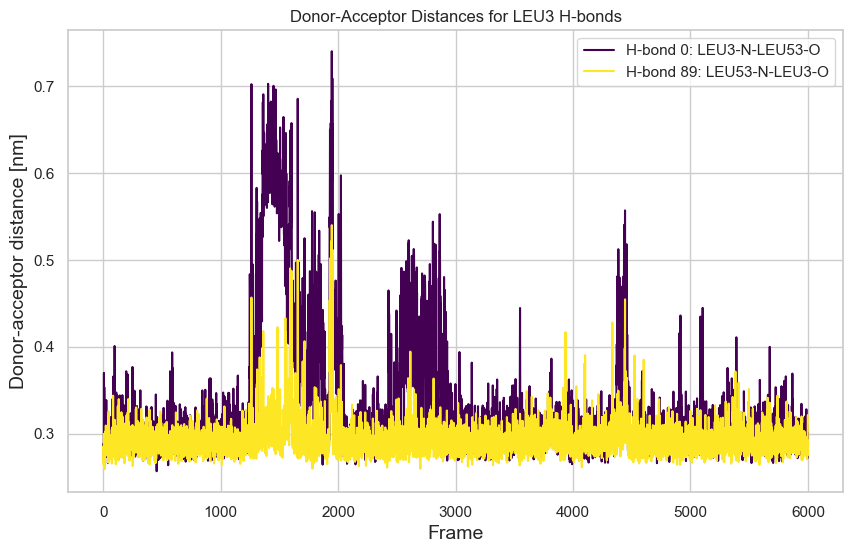

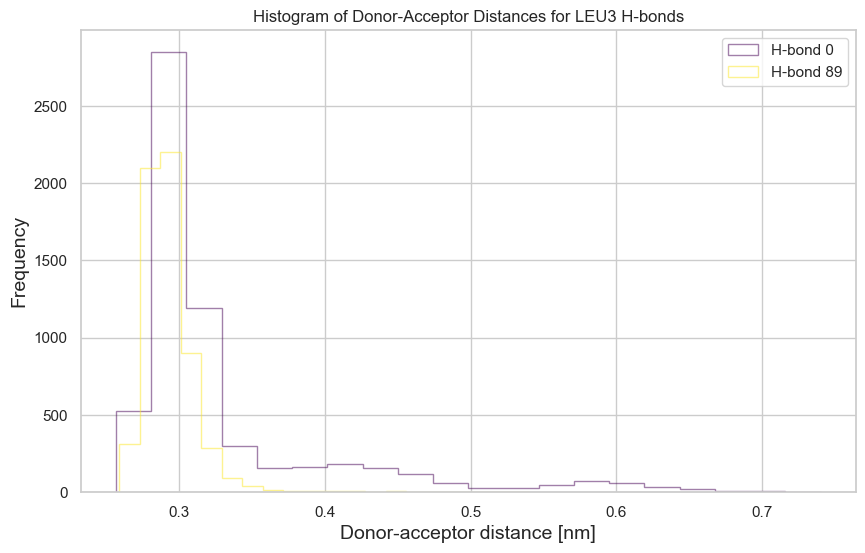

[ 68  69 852] LEU5-N VAL51-O
[837 838  86] VAL51-N LEU5-O


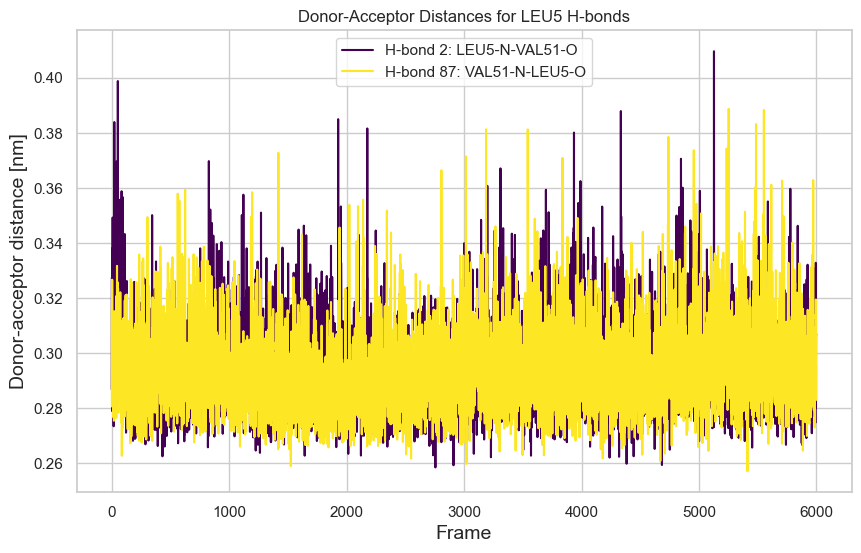

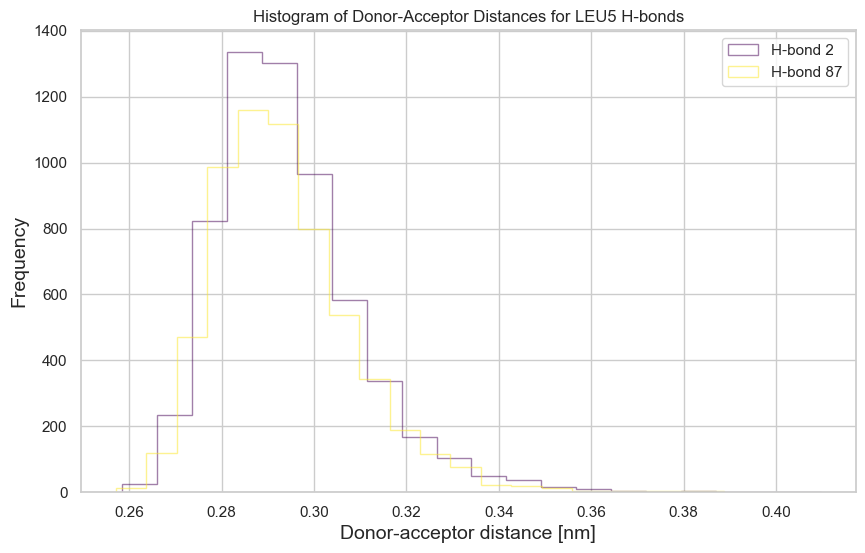

[131 132 824] ILE8-N MET49-O
[808 809 149] MET49-N ILE8-O


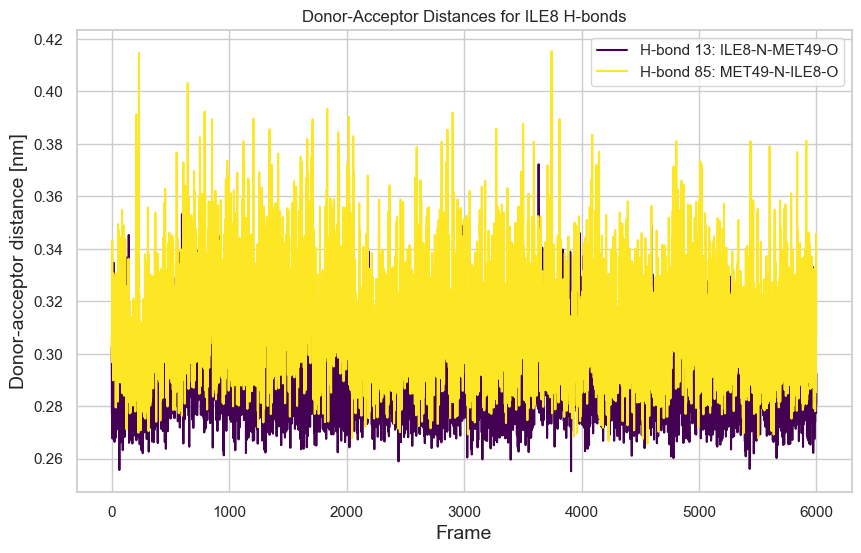

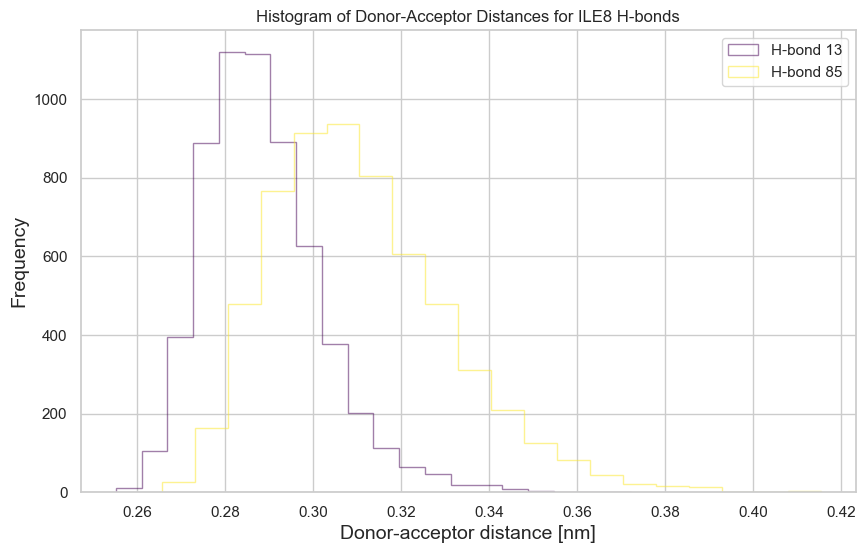

[3299 3300 3251] ILE201-N LEU197-O
[3380 3381 3317] HIS205-N ILE201-O


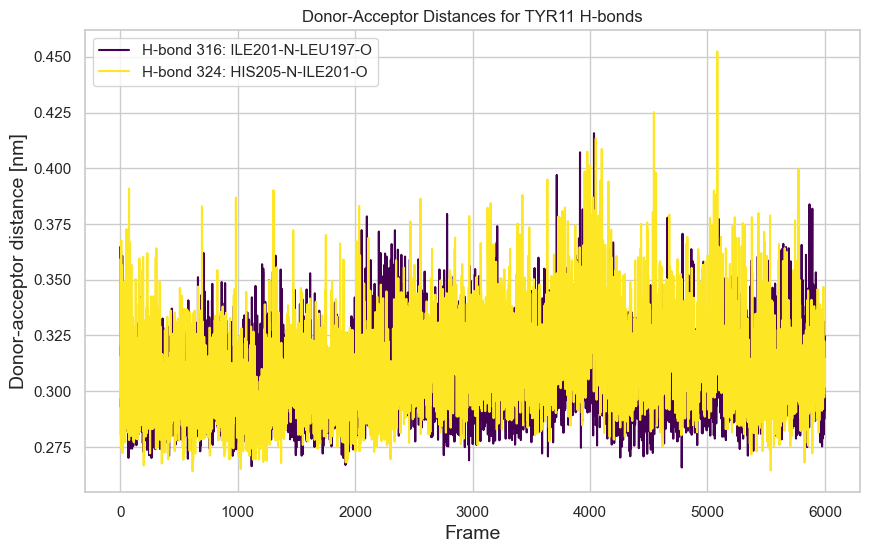

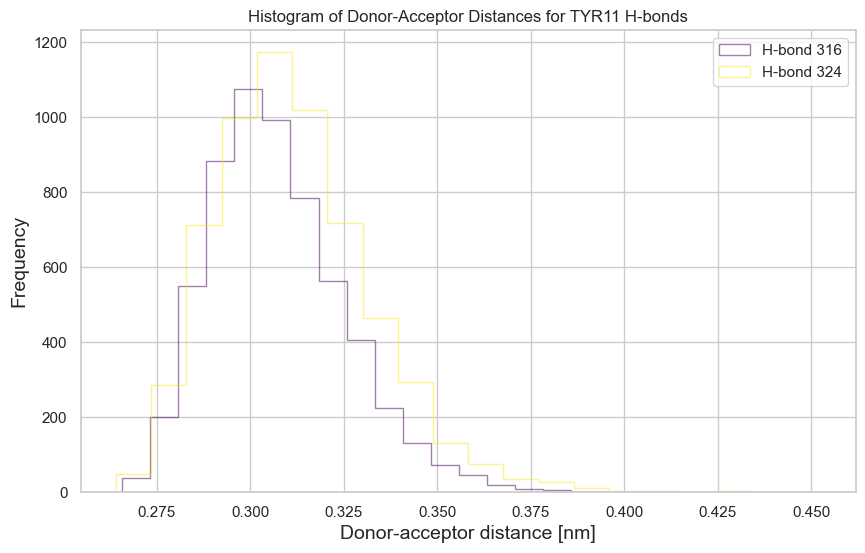

[1078 1079 4202] HIS66-NE2 LIG255-O1
[1078 1079 4204] HIS66-NE2 LIG255-O2
[1947 1948 1083] GLN119-NE2 HIS66-O


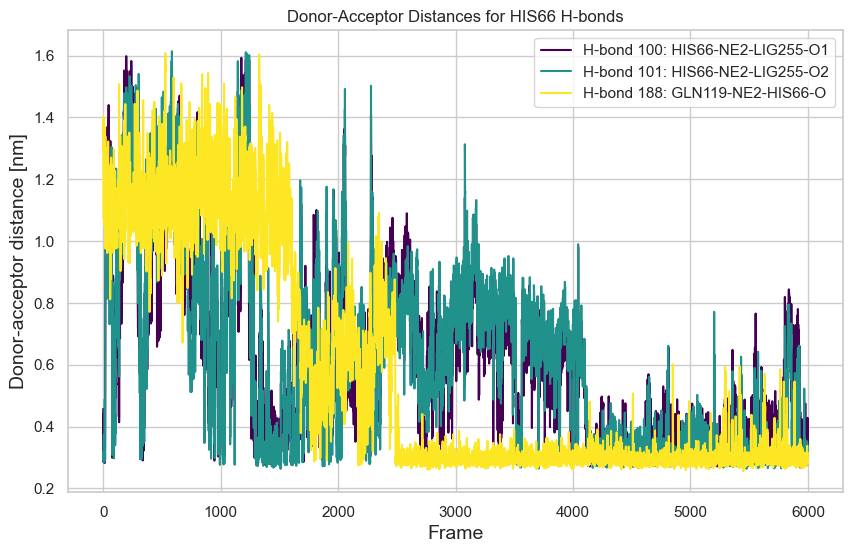

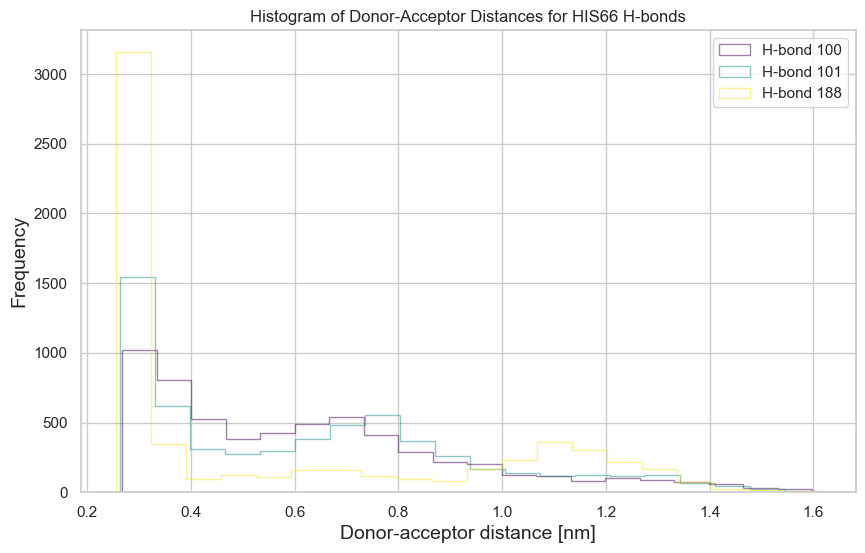

[2104 2105 2048] TYR128-N TYR124-O
[2163 2164 2124] SER131-N TYR128-O
[2117 2118 1713] TYR128-OH ASP105-OD1
[2117 2118 1714] TYR128-OH ASP105-OD2
[2170 2171 2124] SER131-OG TYR128-O


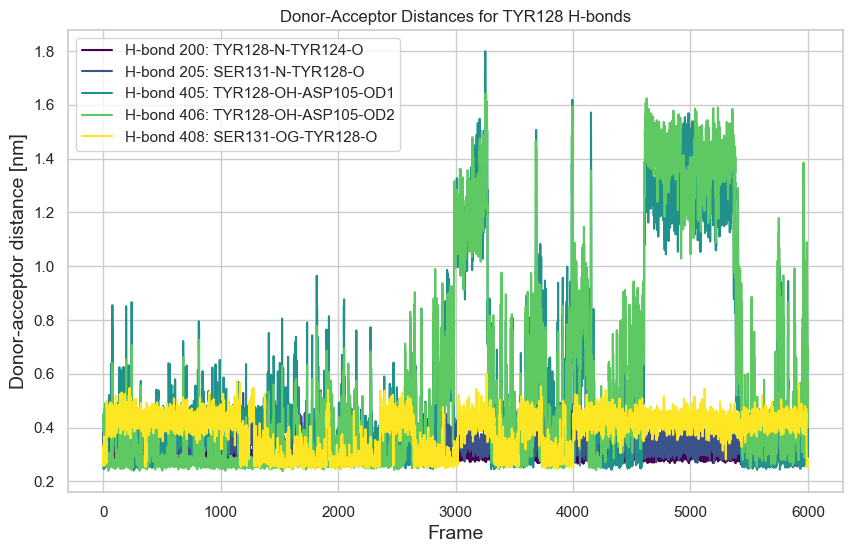

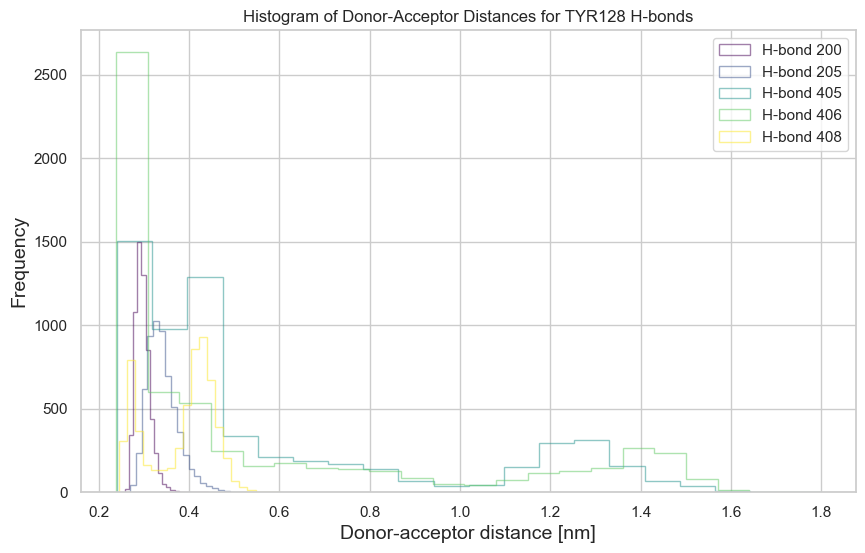

[2729 2730 2717] TRP167-N ARG165-O
[2739 2740 2626] TRP167-NE1 ILE159-O
[2739 2740 2663] TRP167-NE1 ASP162-O


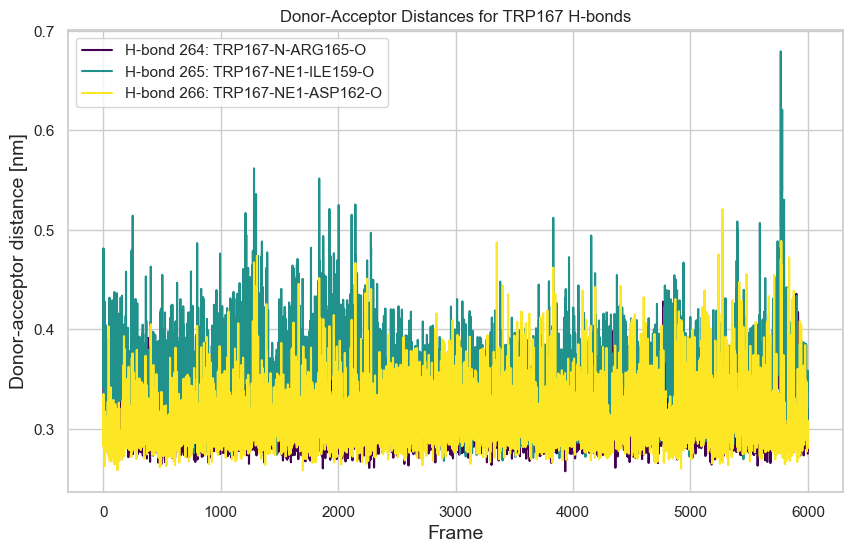

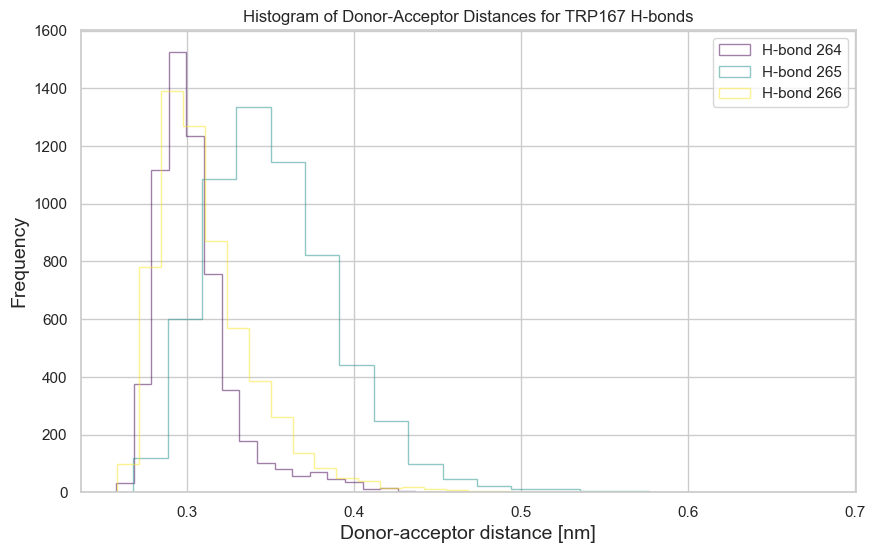

[3299 3300 3251] ILE201-N LEU197-O
[3380 3381 3317] HIS205-N ILE201-O


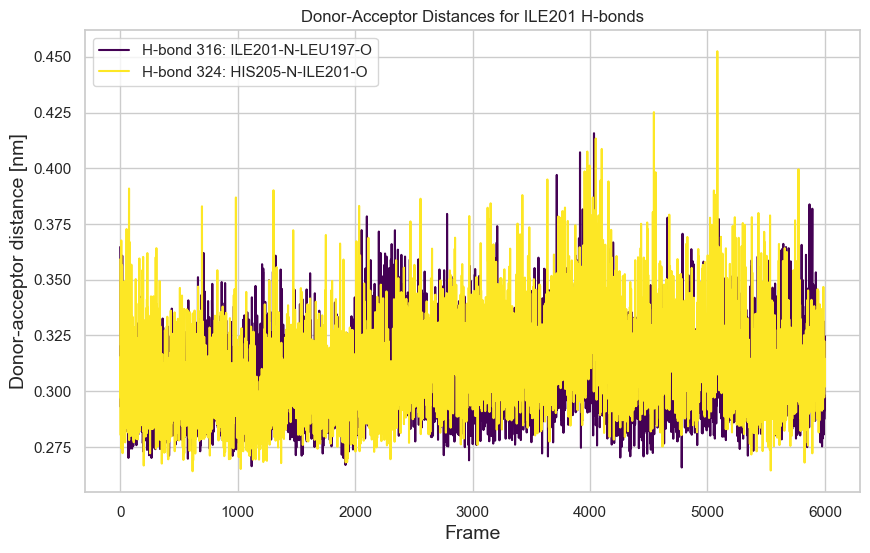

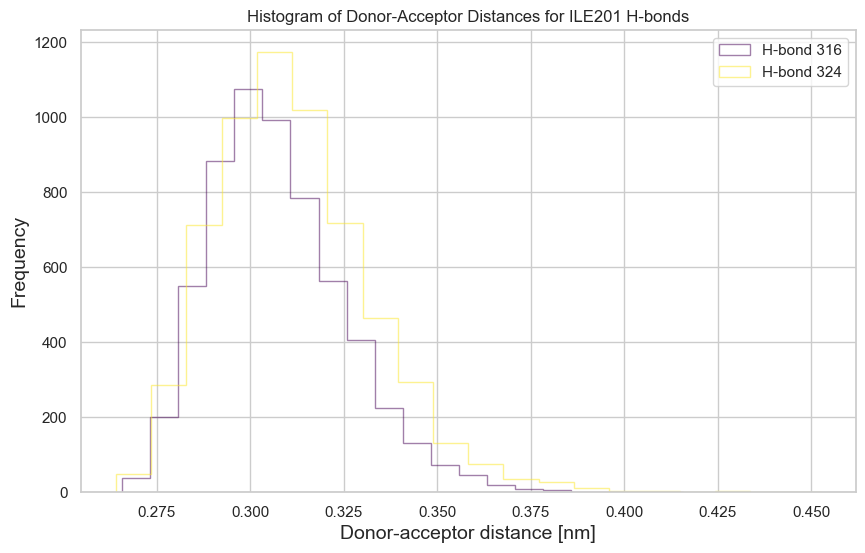

[3318 3319 3267] ARG202-N VAL198-O
[3331 3332 2682] ARG202-NE LEU163-O
[3331 3332 3684] ARG202-NE VAL224-O
[3337 3338 2682] ARG202-NH2 LEU163-O
[3337 3339 2717] ARG202-NH2 ARG165-O
[3397 3398 3341] ALA206-N ARG202-O


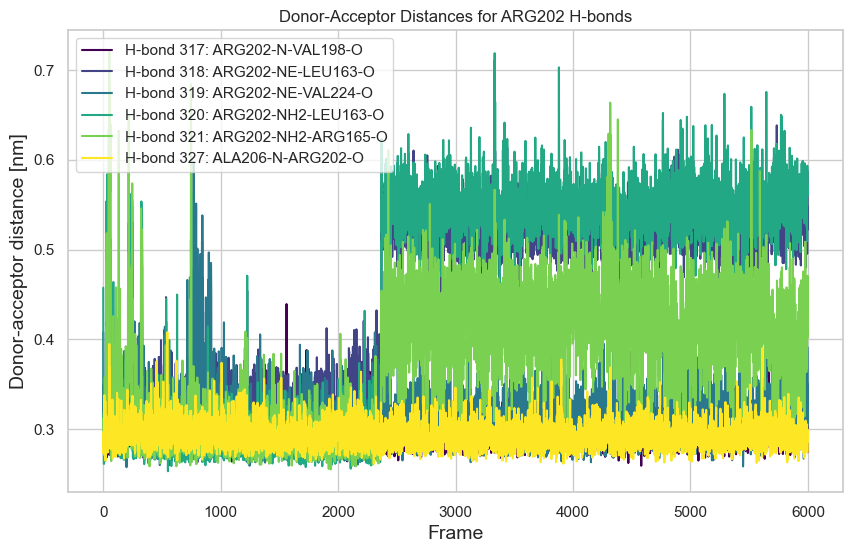

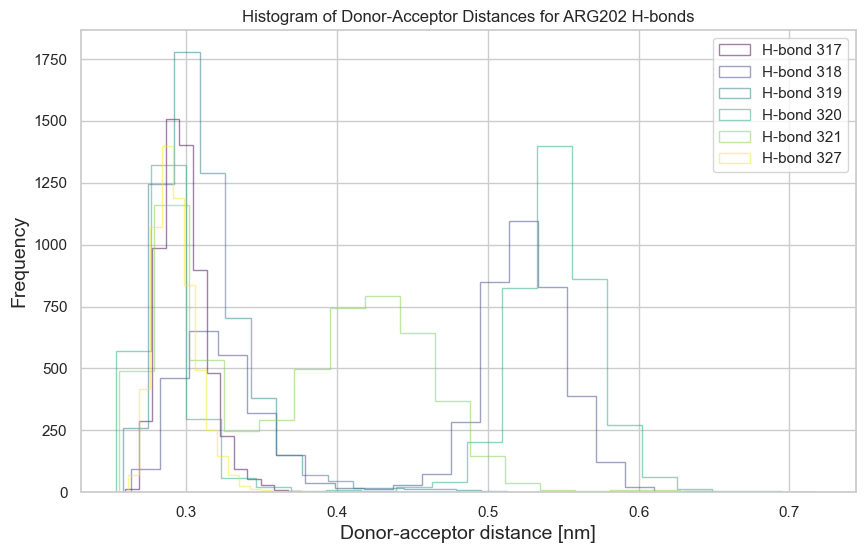

[ 288  289 1029] HIS17-N GLU63-O
[1015 1016  304] GLU63-N HIS17-O
[1030 1031 1026] VAL64-N GLU63-OE1
[1030 1031 1027] VAL64-N GLU63-OE2


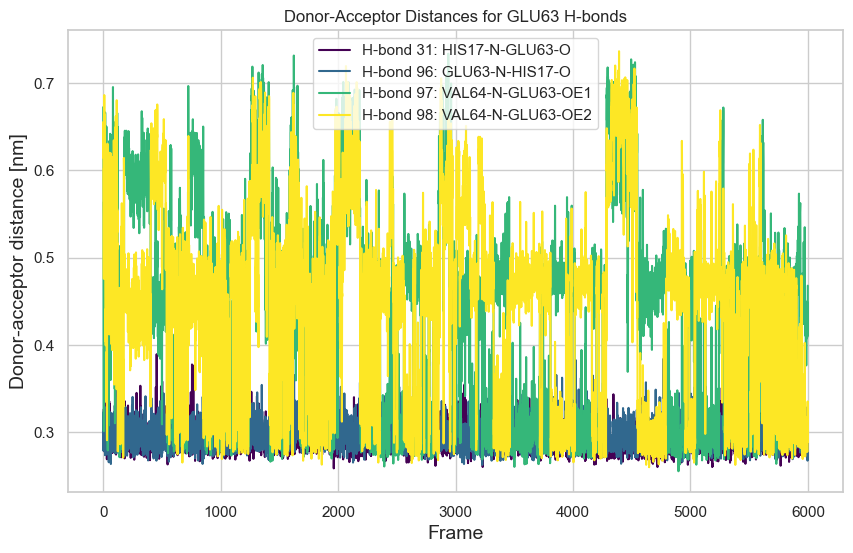

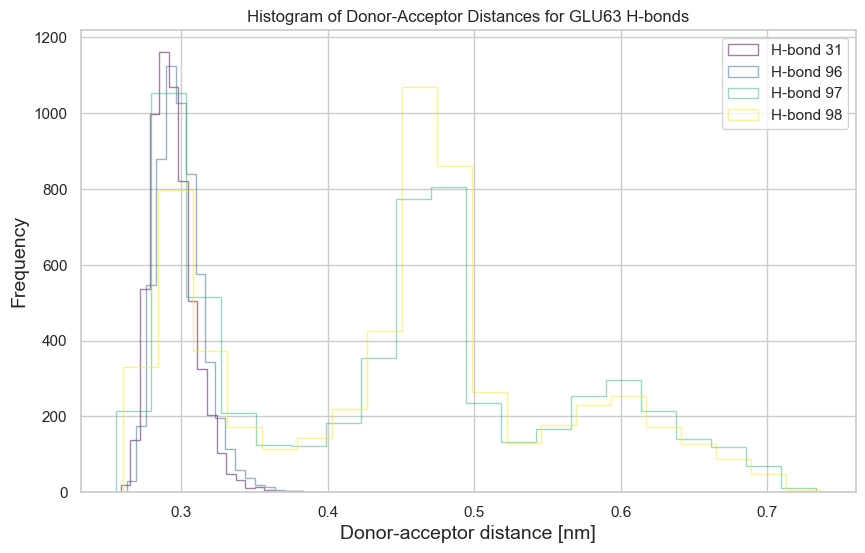

[1078 1079 4202] HIS66-NE2 LIG255-O1
[1078 1079 4204] HIS66-NE2 LIG255-O2


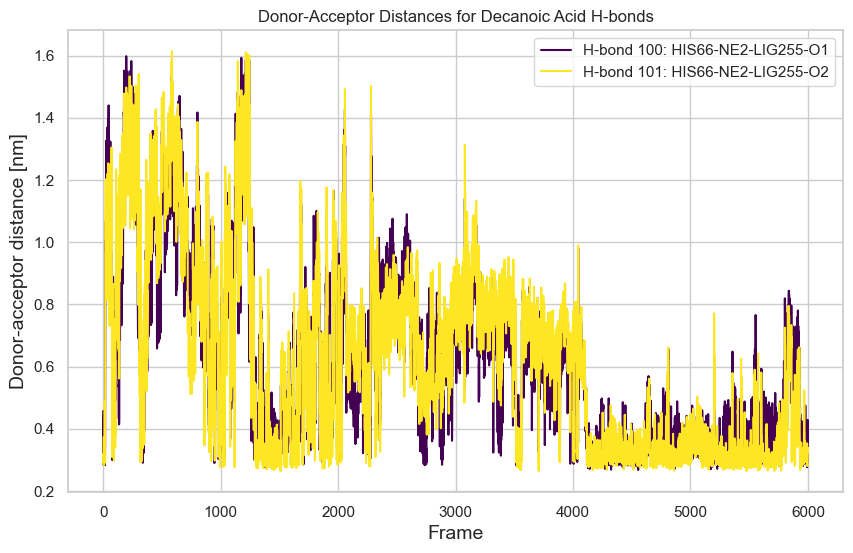

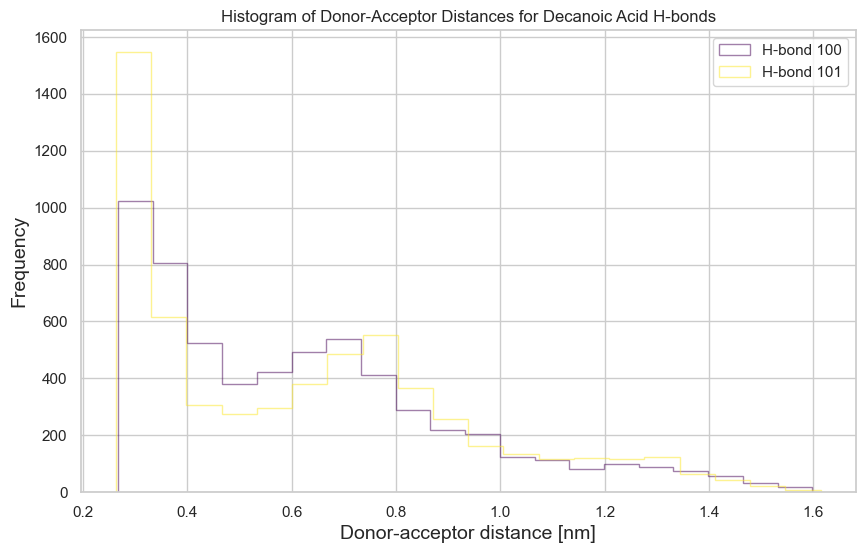

<Figure size 640x480 with 0 Axes>

In [62]:
# H-bonds of interest
def plot_hbonds(hbonds, hbond_indices, trj, top, list_name):
    colors = plt.cm.viridis(np.linspace(0, 1, len(hbond_indices)))
    
    plt.figure(figsize=(10, 6))

    for i, Hbond_index in enumerate(hbond_indices):
        hbond = hbonds[Hbond_index]
        donor = top.atom(hbond[0])
        acc = top.atom(hbond[2])
        print(hbond, donor, acc)

        da_distance = md.compute_distances(trj, [[hbond[0], hbond[2]]], periodic=False)
        
        plt.plot(da_distance, color=colors[i], label=f'H-bond {Hbond_index}: {donor}-{acc}')
        output_file = os.path.join(os.getcwd(), f'{list_name}_da_dist.png')
        plt.savefig(output_file, bbox_inches='tight')

    plt.legend()
    plt.ylabel('Donor-acceptor distance [nm]', size=14)
    plt.xlabel('Frame', size=14)
    plt.title(f'Donor-Acceptor Distances for {list_name}')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    
    for i, Hbond_index in enumerate(hbond_indices):
        hbond = hbonds[Hbond_index]
        da_distance = md.compute_distances(trj, [[hbond[0], hbond[2]]], periodic=False)
        
        plt.hist(da_distance, histtype='step', bins=20, color=colors[i], label=f'H-bond {Hbond_index}', alpha=0.5)
        
    plt.legend()
    plt.ylabel('Frequency', size=14)
    plt.xlabel('Donor-acceptor distance [nm]', size=14)
    plt.title(f'Histogram of Donor-Acceptor Distances for {list_name}')
    output_file = os.path.join(os.getcwd(), f'{list_name}_distance.png')
    plt.savefig(output_file, bbox_inches='tight')
    plt.show()
# 0 , 89 --- LEU3
# 2 , 87 --- LEU5
# 13 , 85--- ILE8
# 316 , 324--- TYR11
# 100 , 101 , 188 ---HIS66
# 200 , 205 , 405 , 406 , 408 --- TYR128
# 264 , 265 , 266 --- TRP167
# 316 , 324 --- ILE201
#317 , 318 , 319 , 320 , 321 , 327 ---ARG202
# 31 , 96 , 97 , 98 ---GLU63
# 437 , 438 ---LIG255
LEU3_hbonds = [0 , 89]  
plot_hbonds(hbonds, LEU3_hbonds, trj, top, 'LEU3 H-bonds')  
LEU5_hbonds = [2 , 87]  
plot_hbonds(hbonds, LEU5_hbonds, trj, top, 'LEU5 H-bonds')  
ILE8_hbonds = [13 , 85]  
plot_hbonds(hbonds, ILE8_hbonds, trj, top, 'ILE8 H-bonds') 
TYR11_hbonds = [316 , 324]  
plot_hbonds(hbonds, TYR11_hbonds, trj, top, 'TYR11 H-bonds') 
HIS66_hbonds = [100 , 101 , 188]  
plot_hbonds(hbonds, HIS66_hbonds, trj, top, 'HIS66 H-bonds')
TYR128_hbonds = [200 , 205 , 405 , 406 , 408]  
plot_hbonds(hbonds, TYR128_hbonds, trj, top, 'TYR128 H-bonds')
TRP167_hbonds = [264 , 265 , 266]  
plot_hbonds(hbonds, TRP167_hbonds, trj, top, 'TRP167 H-bonds')
ILE201_hbonds = [316 , 324]  
plot_hbonds(hbonds, ILE201_hbonds, trj, top, 'ILE201 H-bonds')
ARG202_hbonds = [317 , 318 , 319 , 320 , 321 , 327]  
plot_hbonds(hbonds, ARG202_hbonds, trj, top, 'ARG202 H-bonds')
GLU63_hbonds = [31 , 96 , 97 , 98]  
plot_hbonds(hbonds, GLU63_hbonds, trj, top, 'GLU63 H-bonds')
LIG255_hbonds = [100, 101]  
plot_hbonds(hbonds, LIG255_hbonds, trj, top, 'Decanoic Acid H-bonds')
output_file = os.path.join(os.getcwd(), 'H_bond_LIG_DKA.png')
plt.savefig(output_file, bbox_inches='tight')

In [22]:
import sklearn
from sklearn.decomposition import PCA

pca1 = PCA(n_components=2)
trj.superpose(trj, 0)
reduced_cartesian = pca1.fit_transform(trj.xyz.reshape(trj.n_frames, trj.n_atoms * 3)) #this is done because this has lots of dimensions
print(reduced_cartesian.shape) #look at as a function of time, and project onto first 2 components
# makes co-variance matrix, looking at how much the positions of atoms are coorelated across the residues
# look into linear algebra eigen values and vectors....

(6000, 2)


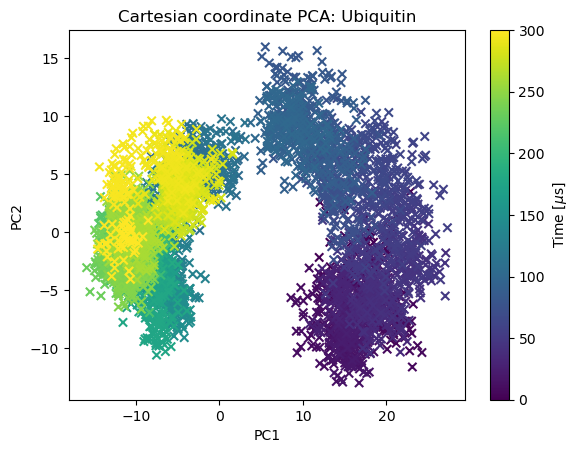

In [23]:
#We Can plot eaceh frame as a function of the values of each PC(principal component): PC1 and PC2
plt.figure()
plt.scatter(reduced_cartesian[:, 0], reduced_cartesian[:,1], marker='x', c=time)
plt.xlabel('PC1')
plt.ylabel('PC2') 
plt.title('Cartesian coordinate PCA: Ubiquitin')
cbar = plt.colorbar()
cbar.set_label('Time [$\mu$s]')
#when you reduce dimensionality for PCA, you want to project properties back onto there to make sure that you have captured relevant information

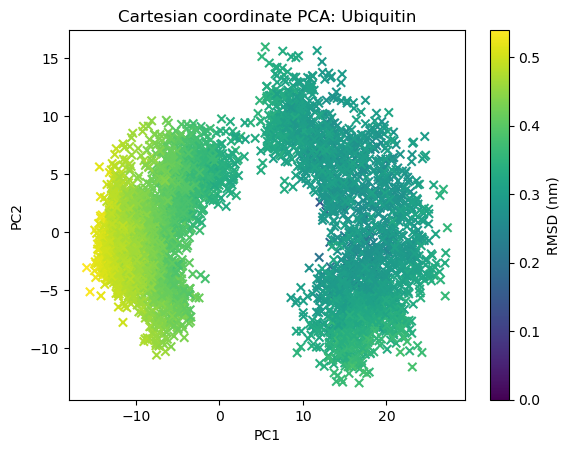

In [24]:
plt.figure()
plt.scatter(reduced_cartesian[:, 0], reduced_cartesian[:,1], marker='x', c=rmsd)
plt.xlabel('PC1')
plt.ylabel('PC2') 
plt.title('Cartesian coordinate PCA: Ubiquitin')
cbar = plt.colorbar()
cbar.set_label('RMSD (nm)')

In [69]:
#Make a Contact Map
contact_maps = []
contact_distances = []
for i in range(1, 76):
    contact_map = []
    contact_distance = []
    for j in range(1, 76):
        if i == j:
            contacts = 0
        else:
            dist = md.compute_contacts(trj, [[i, j]])
            array = np.asarray(dist[0]).astype(float)
            distance = np.average(array)
            contact_distance.append(distance)
            contact = np.where(array < 0.5, 1, 0)
            contacts = np.average(contact)
        contact_map.append(contacts)
    contact_maps.append(contact_map)
    contact_distances.append(contact_distance)
final_map = np.asarray(contact_maps).astype(float)
final_distance = np.asarray(contact_distances).astype(float)


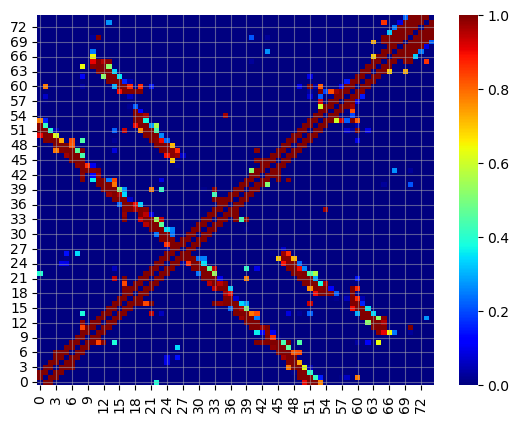

In [70]:
ax = sns.heatmap(final_map, vmin=0.0, vmax=1.0,cmap='jet')
ax.invert_yaxis()
ax.grid(which='both', alpha=0.5)

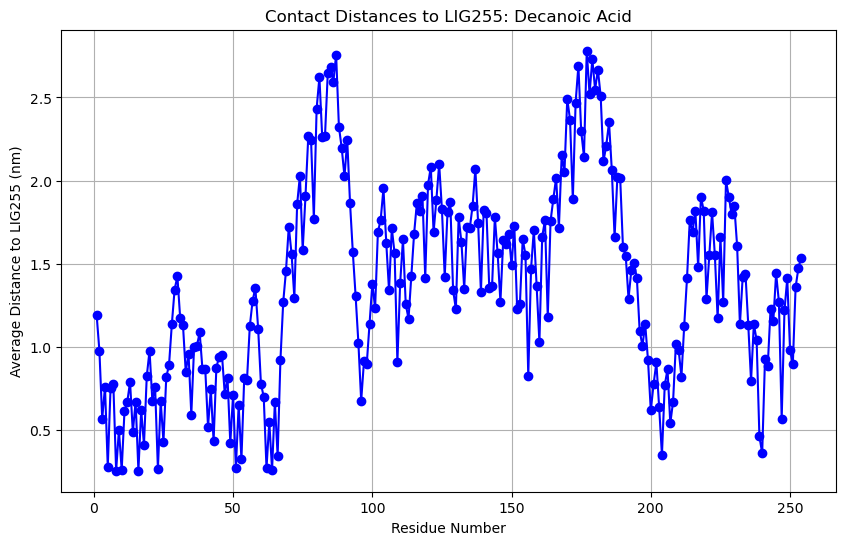

In [39]:
# Plot contact distances from ligand to protein residues
ligand_residue = trj.topology.select('resname LIG and resSeq 255')
# Get the number of residues in the protein (excluding the ligand)
protein_residues = [res for res in trj.topology.residues if res.resSeq != 255]

contact_distances = []

for res in protein_residues:
    residue_atoms = [atom.index for atom in res.atoms]
    distances = md.compute_distances(trj, np.array([[residue_atom, ligand_atom] for residue_atom in residue_atoms for ligand_atom in ligand_residue]))
    min_distances = np.min(distances, axis=1)
    contact_distances.append(np.mean(min_distances))

# Generate residue numbers for the x-axis
residue_numbers = [res.resSeq for res in protein_residues]
#save to .dat file
outfile = os.path.join(outdir, 'RegA_DKA_contact_distances.dat')
with open(outfile, 'w') as f:
    f.write('# Residue_Number Average_Distance_to_LIG255(nm)\n')
    for res_num, distance in zip(residue_numbers, contact_distances):
        f.write(f'{res_num} {distance}\n')
# Plot the distances
plt.figure(figsize=(10, 6))
plt.plot(residue_numbers, contact_distances, marker='o', linestyle='-', color='b')
plt.xlabel('Residue Number')
plt.ylabel('Average Distance to LIG255 (nm)')
plt.title('Contact Distances to LIG255: Decanoic Acid')
plt.grid(True)
plt.show()

In [25]:
import pyblock
from itertools import chain
def get_blockerrors_pyblock(Data, bound_frac):
    n_data = len(Data[0])
    block_errors = []
    ave = []
    for i in range(0, n_data):
        data = Data[:, i]
        average = np.average(data)
        if (average != 0) and (average != 1):
            reblock_data = pyblock.blocking.reblock(data)
            opt = pyblock.blocking.find_optimal_block(
                len(data), reblock_data)[0]
            if type(opt) != int: 
                opt = 10
            opt_block = reblock_data[opt]
            be = opt_block[4]
        else:
            be = 0
        ave.append(average)
        block_errors.append(be)

    ave_bf = np.asarray(ave)/bound_frac
    be_bf = np.asarray(block_errors)/bound_frac
    return ave_bf, be_bf

Fraction Bound: 1.0


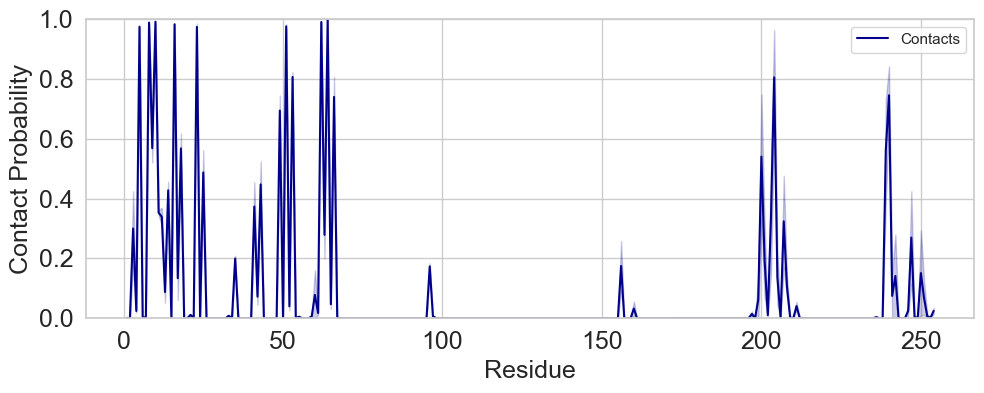

[[1.00000000e+00 1.00000000e-03 5.23735392e-04]
 [2.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.00000000e+00 2.99833333e-01 1.24724428e-01]
 [4.00000000e+00 2.43333333e-02 5.87945574e-03]
 [5.00000000e+00 9.73833333e-01 6.73624746e-03]
 [6.00000000e+00 1.83333333e-03 7.86871371e-04]
 [7.00000000e+00 4.00000000e-03 2.24858543e-03]
 [8.00000000e+00 9.87666667e-01 4.92598748e-03]
 [9.00000000e+00 5.68500000e-01 4.80957031e-02]
 [1.00000000e+01 9.90666667e-01 3.81585507e-03]
 [1.10000000e+01 3.53000000e-01 8.54492188e-03]
 [1.20000000e+01 3.38833333e-01 3.02734375e-02]
 [1.30000000e+01 8.76666667e-02 3.58790447e-02]
 [1.40000000e+01 4.27500000e-01 2.85644531e-02]
 [1.50000000e+01 2.83333333e-03 8.17394947e-04]
 [1.60000000e+01 9.82333333e-01 2.76213586e-03]
 [1.70000000e+01 1.33833333e-01 7.22660209e-02]
 [1.80000000e+01 5.67500000e-01 5.04900538e-02]
 [1.90000000e+01 3.33333333e-04 3.36021505e-04]
 [2.00000000e+01 0.00000000e+00 0.00000000e+00]
 [2.10000000e+01 1.13333333e-02 2.230015

<Figure size 640x480 with 0 Axes>

In [26]:
contact_pairs = np.zeros((254, 2))
ligand_residue_index = 254

for i in range(0, 254):
    contact_pairs[i] = [i, ligand_residue_index]
contact = md.compute_contacts(trj, contact_pairs, scheme='closest-heavy')
contacts = np.asarray(contact[0]).astype(float)
cutoff = 0.6
contact_matrix = np.where(contacts < cutoff, 1, 0)
contact_prob = np.sum(contact_matrix, axis=0)/trj.n_frames
np.savetxt(outdir+'contacts.traj.dat', contact_matrix, '%i')


contact_rows = np.sum(contact_matrix, axis=1)
contact_frames = np.where(contact_rows > 0)[0]
nocontact_frames = np.where(contact_rows == 0)[0]
contact_fraction = np.sum(np.where(contact_rows > 0, 1, 0))/len(contact_rows)
print("Fraction Bound:", contact_fraction)

# Total Contacts with errors
contact_ave, contact_pyb_be = get_blockerrors_pyblock(contact_matrix, 1.0)
contact_ave, contact_pyb_be_max = get_blockerrors_pyblock(contact_matrix, 1.0)

contact_be = np.column_stack((range(1,ligand_residue_index+1), contact_ave, contact_pyb_be))
contact_be_max = np.column_stack((range(1,ligand_residue_index+1), contact_ave, contact_pyb_be_max))

np.savetxt('%s/RegA_DKA_contact.be.pyblock.dat' % outdir, contact_be, '%.4f')
np.savetxt('%s/RegA_DKA_contact.be.pyblock.max.dat' % outdir, contact_be_max, '%.4f')
sns.set(style='whitegrid')

Contact = contact_be
plt.figure(figsize=(10, 4))
sns.lineplot(x=Contact[:, 0], y=Contact[:, 1],
             color='darkblue', label='Contacts')
plt.fill_between(Contact[:, 0], Contact[:, 1]+Contact[:, 2],
                 Contact[:, 1]-Contact[:, 2], color='darkblue', alpha=0.2)

plt.xlabel('Residue', size=18)
plt.ylabel('Contact Probability', size=18)
plt.tick_params(labelsize=18)
plt.tight_layout()
plt.savefig(outdir+'RegA_DKA_ContactFraction.byResidue.ClosestHeavy.png')
plt.ylim(0, 1)
plt.show()
plt.clf()
print(Contact)

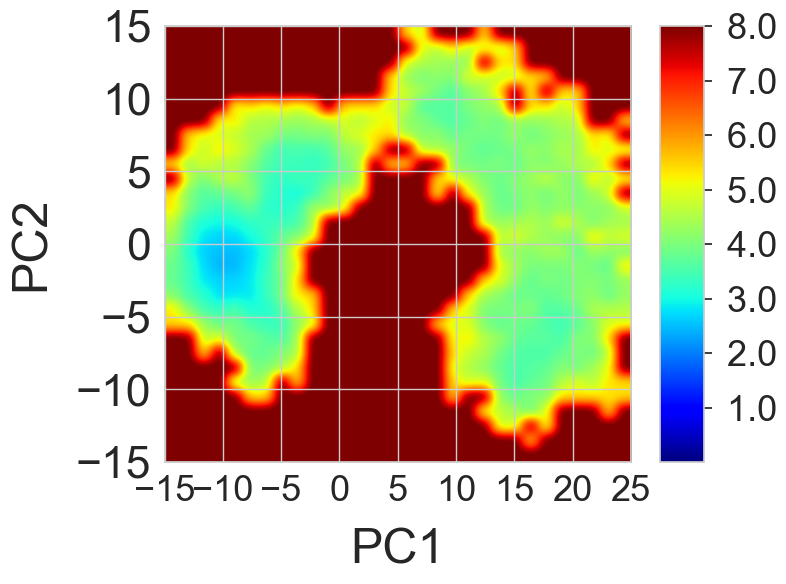

In [27]:
###Make a Pretty Free Energy Plot of PC1 vs. PC2
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate free energy
def free_energy(a, b, T, y0, ymax, x0, xmax):
    free_energy, xedges, yedges = np.histogram2d(
        a, b, 30, [[y0, ymax], [x0, xmax]], density=True, weights=None)
    free_energy = np.log(np.flipud(free_energy)+.000001)
    free_energy = -(0.001987*T)*free_energy
    return free_energy, xedges, yedges

PC1 = reduced_cartesian[:, 0]
PC2 = reduced_cartesian[:, 1]

# Calculate free energy with new ranges for PC1 and PC2
dG, xedges, yedges = free_energy(PC2, PC1, 300, -15, 15, -15, 25)

# Create figure and axis
fig = plt.figure(figsize=(8, 6))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')

# Set colorbar
cbar_ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8]
cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'), aspect=10)
cb.ax.tick_params(labelsize=26)

# Set axis labels and ticks
plt.xlabel("PC1", size=35, labelpad=15)
plt.ylabel("PC2", size=35, labelpad=15)
plt.xticks(fontsize=26)
plt.yticks(fontsize=32)

# Set axis limits and color limits
plt.xlim(-15, 25)
plt.ylim(-15, 15)
plt.clim(vmin=0.01, vmax=8.0)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


RegA_DKA structure appears to have 2 main states aboved in PCA.

In [28]:
PC_state1_indices = np.where(PC1 < 5)[0]  
PC_state2_indices = np.where(PC2 > 5)[0]  

PC_state1_selected = PC_state1_indices[::5]
PC_state2_selected = PC_state2_indices[::5]
print(PC_state1_selected)
print(PC_state2_selected)

[1828 2024 2039 2044 2049 2054 2059 2064 2069 2074 2079 2084 2089 2094
 2099 2104 2109 2114 2119 2124 2129 2134 2139 2144 2149 2154 2159 2164
 2169 2174 2179 2184 2189 2194 2199 2204 2209 2214 2219 2224 2229 2234
 2239 2244 2249 2254 2259 2264 2269 2274 2279 2284 2289 2294 2299 2304
 2309 2314 2319 2324 2329 2334 2339 2344 2349 2354 2359 2364 2369 2374
 2379 2384 2389 2394 2399 2404 2409 2414 2419 2424 2429 2434 2439 2444
 2449 2454 2459 2464 2469 2474 2479 2484 2489 2494 2499 2504 2509 2514
 2519 2524 2529 2534 2539 2544 2549 2554 2559 2564 2569 2574 2579 2584
 2589 2594 2599 2604 2609 2614 2619 2624 2629 2634 2639 2644 2649 2654
 2659 2664 2669 2674 2679 2684 2689 2694 2699 2704 2709 2714 2719 2724
 2729 2734 2739 2744 2749 2754 2759 2764 2769 2774 2779 2784 2789 2794
 2799 2804 2809 2814 2819 2824 2829 2834 2839 2844 2849 2854 2859 2864
 2869 2874 2879 2884 2889 2894 2899 2904 2909 2914 2919 2924 2929 2934
 2939 2944 2949 2954 2959 2964 2969 2974 2979 2984 2989 2994 2999 3004
 3009 

Identify trends in dihedral angles across frames for residues of interest.

Residue LEU3 (Index 2)


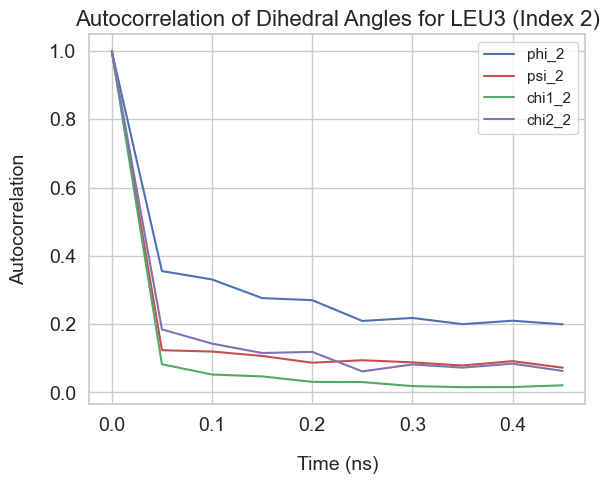

Residue LEU5 (Index 4)


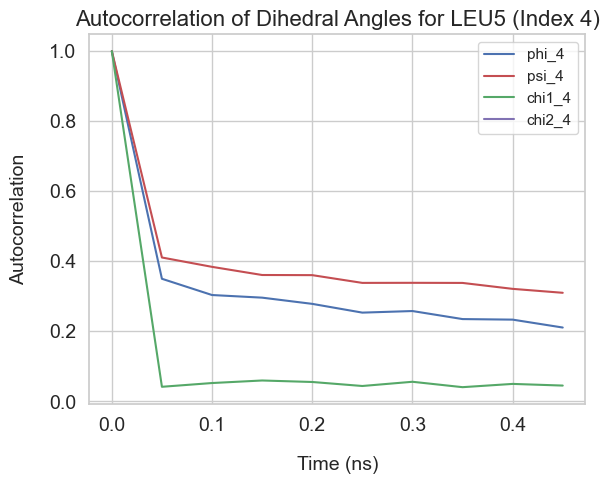

Residue ILE8 (Index 7)


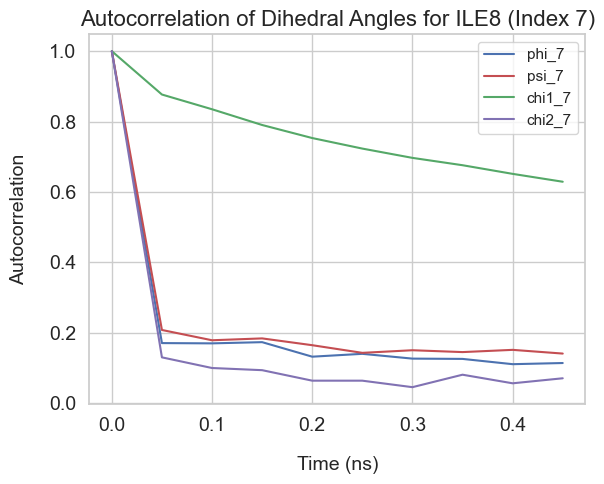

Residue TYR11 (Index 10)


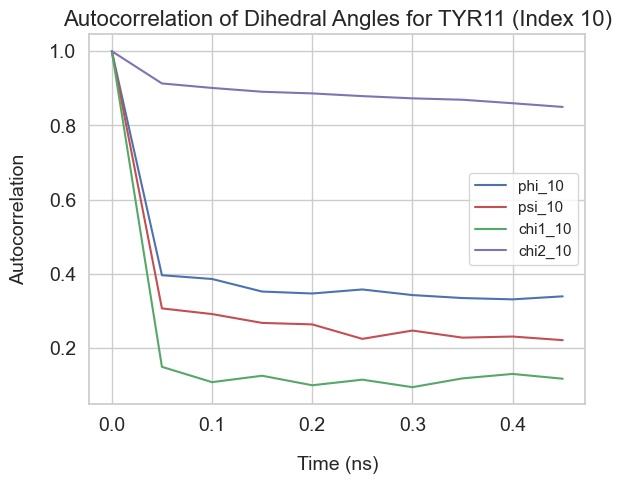

Residue HIS66 (Index 65)


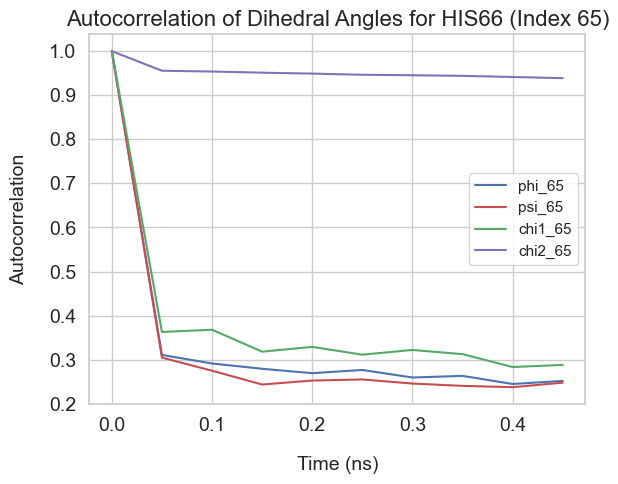

Residue TYR128 (Index 127)


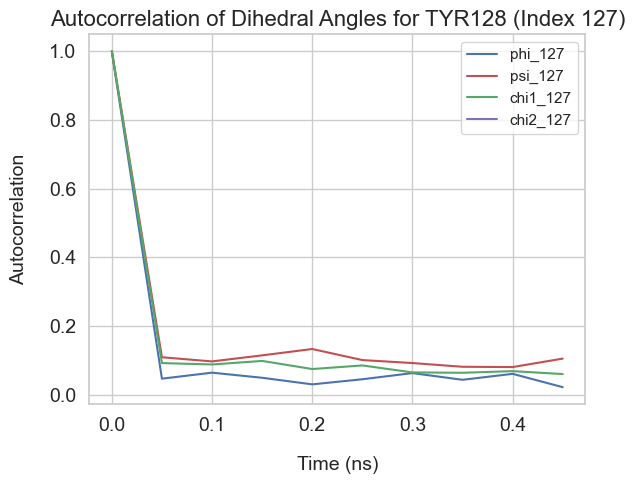

Residue TRP167 (Index 166)


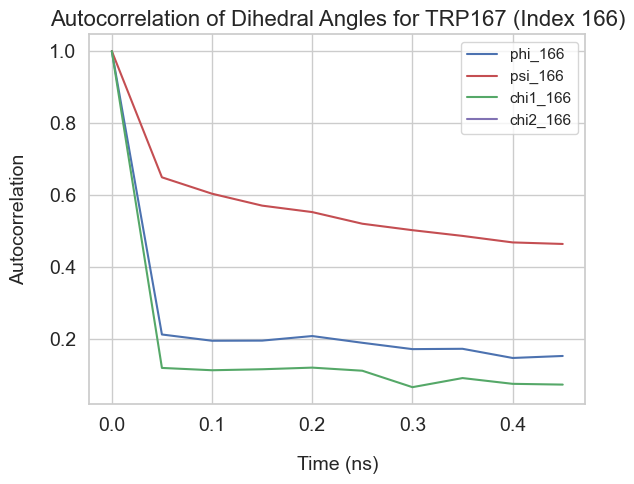

Residue ILE201 (Index 200)


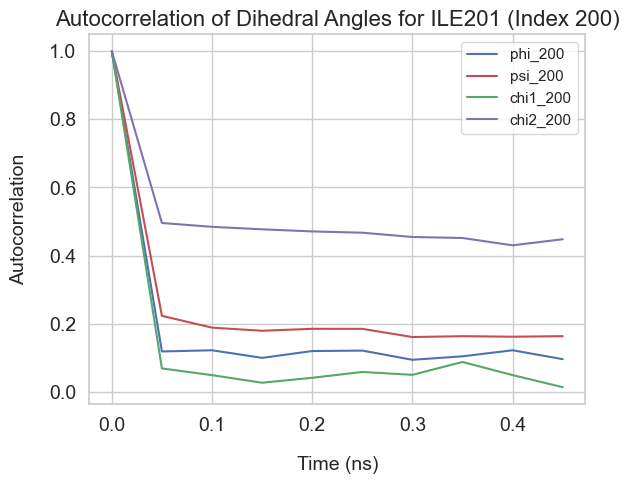

Residue ARG202 (Index 201)


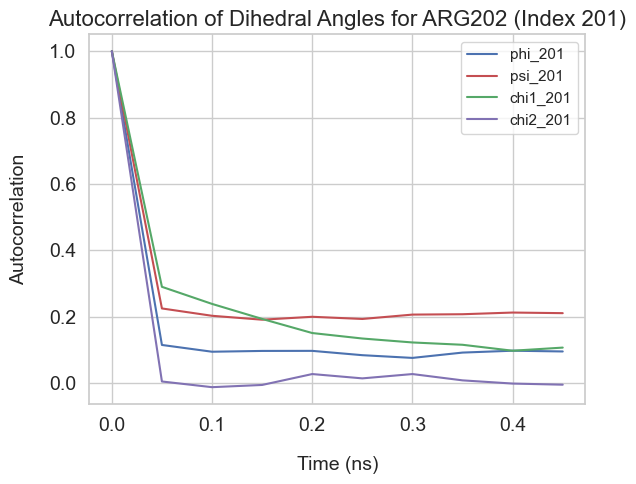

Residue GLU63 (Index 62)


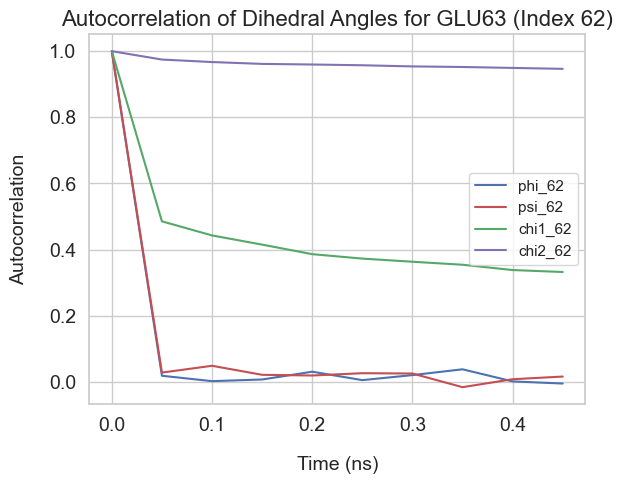

In [31]:
def autocorr1(x, lags):
    '''numpy.corrcoef, partial'''
    corr = [1. if l == 0 else np.corrcoef(x[l:], x[:-l])[0][1] for l in lags]
    return np.array(corr)

res_interest= [2, 4, 7, 10, 65, 127, 166, 200, 201, 62]
# Define time in microseconds
time = np.linspace(0, 300, trj.n_frames)
lags = range(10)  # Takes time series and correlates it to itself but lagged by 10 steps

# Function to get residue name and sequence number
def get_residue_info(residue_index, topology):
    residue = topology.residue(residue_index)
    return residue.name, residue.resSeq

# Iterate over each residue in array
for res in res_interest:
    resname, resnum = get_residue_info(res, trj.topology)
    print(f"Residue {resname}{resnum} (Index {res})")

    # Calculate autocorrelation for phi, psi, chi1, and chi2 for the current residue
    phi_acf = autocorr1(dihedral_dict['phi'].get(res, []), lags)
    psi_acf = autocorr1(dihedral_dict['psi'].get(res, []), lags)
    chi1_acf = autocorr1(dihedral_dict.get('chi1', {}).get(res, []), lags)
    chi2_acf = autocorr1(dihedral_dict.get('chi2', {}).get(res, []), lags)

    # Plot autocorrelation for each dihedral angle
    plt.plot(time[lags], phi_acf, color='b', label=f'phi_{res}')
    plt.plot(time[lags], psi_acf, color='r', label=f'psi_{res}')
    plt.plot(time[lags], chi1_acf, color='g', label=f'chi1_{res}')
    plt.plot(time[lags], chi2_acf, color='m', label=f'chi2_{res}')

    plt.xlabel("Time (ns)", size=14, labelpad=15)
    plt.ylabel("Autocorrelation", size=14, labelpad=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(f"Autocorrelation of Dihedral Angles for {resname}{resnum} (Index {res})", size=16)
    plt.legend()
    plt.show()
#This will get angry when it encounters residues that don't have all of the dihedral residues, but thats okay. I will ignore this. 

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define autocorrelation function
def autocorr1(x, lags):
    '''numpy.corrcoef, partial'''
    corr = [1. if l == 0 else np.corrcoef(x[l:], x[:-l])[0][1] for l in lags]
    return np.array(corr)

auto_corr_time_dict = {}
# Iterate over each residue in residues array
for angle in dihedral_dict.keys():
    for residue in dihedral_dict[angle].keys():
        # Calculate autocorrelation for each dihedral angle
        angle_acf = autocorr1(dihedral_dict[angle].get(residue, np.zeros(trj.n_frames)), lags)
    
        # Define a linear function for regression
        def linear_func(t, m, c):
            return m * t + c

        # Perform linear regression for each autocorrelation curve using the first two lag values
        linfit_angle, _ = curve_fit(linear_func, time[lags[:2]], angle_acf[:2])

        # Print the slopes
        print(f"Autocorrelation time for {angle} at residues {residue}: {-1/linfit_angle[0]}")
        if angle not in auto_corr_time_dict.keys(): \
            auto_corr_time_dict[angle]={}
        auto_corr_time_dict[angle][residue] = - 1/linfit_angle[0]
        

C:\Users\grace\AppData\Local\Temp\ipykernel_12596\1031893212.py:23: OptimizeWarning: Covariance of the parameters could not be estimated
  linfit_angle, _ = curve_fit(linear_func, time[lags[:2]], angle_acf[:2])


Autocorrelation time for phi at residues 2: 0.07761085007254187
Autocorrelation time for phi at residues 3: 0.09798387625777545
Autocorrelation time for phi at residues 4: 0.07696913706661453
Autocorrelation time for phi at residues 5: 0.15289895831679826
Autocorrelation time for phi at residues 6: 0.06966135424098703
Autocorrelation time for phi at residues 7: 0.06025263259016398
Autocorrelation time for phi at residues 8: 0.06033592952693845
Autocorrelation time for phi at residues 9: 0.07691206637353244
Autocorrelation time for phi at residues 10: 0.08291148102806681
Autocorrelation time for phi at residues 11: 0.06304780197322789
Autocorrelation time for phi at residues 12: 0.07040107273814467
Autocorrelation time for phi at residues 13: 0.05959467492747219
Autocorrelation time for phi at residues 14: 0.05854493437478786
Autocorrelation time for phi at residues 15: 0.06963575469074987
Autocorrelation time for phi at residues 16: 0.10844546472660083
Autocorrelation time for phi at r

C:\Users\grace\AppData\Local\Temp\ipykernel_12596\827683006.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_, pcov_ = curve_fit(linear_func, time[lags][:2], np.log(dihedral_acf[:2]))


Residue chi1_137 has correlation time longer than 0.9 microseconds: 1.2608890279846519 microseconds.
Residue chi1_147 has correlation time longer than 0.9 microseconds: 2.4383742855355948 microseconds.
Residue chi2_62 has correlation time longer than 0.9 microseconds: 1.9484001240600357 microseconds.
Residue chi2_65 has correlation time longer than 0.9 microseconds: 1.102563925347455 microseconds.
Residue chi2_109 has correlation time longer than 0.9 microseconds: 2.0637369727925825 microseconds.
Residue chi2_128 has correlation time longer than 0.9 microseconds: 1.054225610364877 microseconds.
Residue chi2_204 has correlation time longer than 0.9 microseconds: 1.326476267572279 microseconds.
Residue chi2_226 has correlation time longer than 0.9 microseconds: 1.421636523250056 microseconds.
Residue chi2_239 has correlation time longer than 0.9 microseconds: 0.9338844982150324 microseconds.
Residue chi2_240 has correlation time longer than 0.9 microseconds: 2.8164228641576057 microsecon

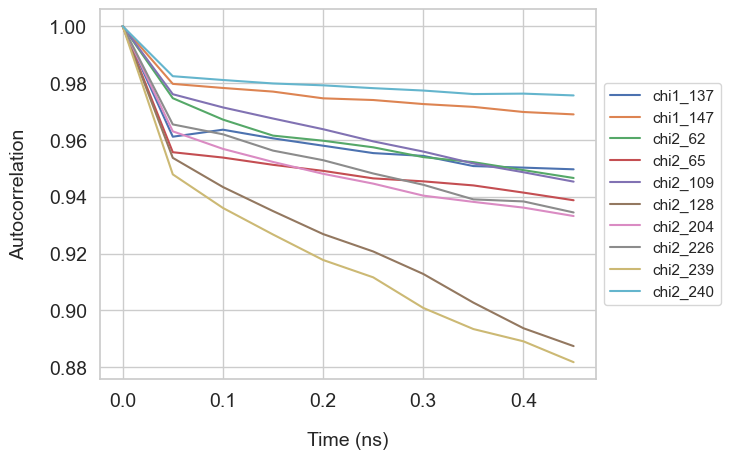

In [33]:
import numpy as np
import matplotlib.pyplot as plt
# Define threshold value here (in nanoseconds)
threshold = 0.9

residues_above_threshold = []
# Loop over all phi/psi/chi1/chi2 residues
for residue_type in ['phi', 'psi', 'chi1', 'chi2']:
    for residue_number, dihedral_data in dihedral_dict[residue_type].items():
        # Calculate autocorrelation for each dihedral angle
        dihedral_acf = autocorr1(dihedral_data, lags)
        # Calculate correlation time 
        correlation_time = 0
        if dihedral_acf[1] > 0:
            popt_, pcov_ = curve_fit(linear_func, time[lags][:2], np.log(dihedral_acf[:2]))
            correlation_time = -1/popt_[0]
            if correlation_time > threshold:
                residues_above_threshold.append((residue_type, residue_number, correlation_time))
                print(f"Residue {residue_type}_{residue_number} has correlation time longer than {threshold} microseconds: {correlation_time} microseconds.")
# Plotting only residues with correlation time greater than the threshold
for residue_type, residue_number, correlation_time in residues_above_threshold:
    dihedral_acf = autocorr1(dihedral_dict[residue_type][residue_number], lags)
    plt.plot(time[lags], dihedral_acf, label=f"{residue_type}_{residue_number}")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Time (ns)", size=14, labelpad=15)
plt.ylabel("Autocorrelation", size=14, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(size='14')
plt.yticks(size='14')
plt.show()

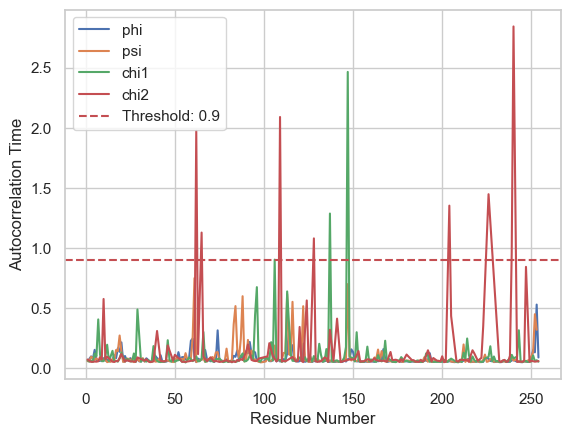

In [34]:
#This gives me a plot of the autocorrelation times for each dihedral angle for all residues. 
for angle in auto_corr_time_dict.keys(): 
    a_corr_arr = []
    residues = list(auto_corr_time_dict[angle].keys())
    for residue in residues:
        a_corr_arr.append(auto_corr_time_dict[angle][residue])
    plt.plot(residues, a_corr_arr, label=angle)
plt.legend()
plt.xlabel('Residue Number')  
plt.ylabel('Autocorrelation Time')  
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')  
plt.legend()
plt.show()

In [35]:
#Do this again for each PC states
PC_state1_auto_corr_time_dict = {}

# Iterate over each residue in residues array
for angle in dihedral_dict.keys():
    for residue in dihedral_dict[angle].keys():
        # Get dihedral data for the current angle and residue, and slice using PC_state1_indices
        dihedral_data = dihedral_dict[angle][residue]
        dihedral_data_pc_state1 = dihedral_data[PC_state1_indices]
        
        # Calculate autocorrelation for each dihedral angle
        angle_acf = autocorr1(dihedral_data_pc_state1, lags)
        
        # Check if the values in angle_acf[:2] are positive and non-zero
        if np.all(angle_acf[:2] > 0):
            # Define a linear function for regression
            def linear_func(t, m, c):
                return m * t + c

            # Perform linear regression for each autocorrelation curve using the first two lag values
            linfit_angle, _ = curve_fit(linear_func, time[lags[:2]], np.log(angle_acf[:2]))

            # Print the slopes
            correlation_time = -1 / linfit_angle[0]
            print(f"Autocorrelation time for {angle} at residue {residue}: {correlation_time}")
            
            if angle not in PC_state1_auto_corr_time_dict:
                PC_state1_auto_corr_time_dict[angle] = {}
            PC_state1_auto_corr_time_dict[angle][residue] = correlation_time
print(PC_state1_auto_corr_time_dict)

C:\Users\grace\AppData\Local\Temp\ipykernel_12596\1937218375.py:21: OptimizeWarning: Covariance of the parameters could not be estimated
  linfit_angle, _ = curve_fit(linear_func, time[lags[:2]], np.log(angle_acf[:2]))


Autocorrelation time for phi at residue 2: 0.05131854393594484
Autocorrelation time for phi at residue 3: 0.06746629051594775
Autocorrelation time for phi at residue 4: 0.052483794622774714
Autocorrelation time for phi at residue 5: 0.11012846076948633
Autocorrelation time for phi at residue 6: 0.03987271303853565
Autocorrelation time for phi at residue 7: 0.026478747626825904
Autocorrelation time for phi at residue 8: 0.024940814113790465
Autocorrelation time for phi at residue 9: 0.05003354870902241
Autocorrelation time for phi at residue 10: 0.05684713833782505
Autocorrelation time for phi at residue 11: 0.02052394281279212
Autocorrelation time for phi at residue 12: 0.041458480627144134
Autocorrelation time for phi at residue 13: 0.02698244409098643
Autocorrelation time for phi at residue 14: 0.02725071372420833
Autocorrelation time for phi at residue 15: 0.037413226312774384
Autocorrelation time for phi at residue 16: 0.09613047607090966
Autocorrelation time for phi at residue 17:

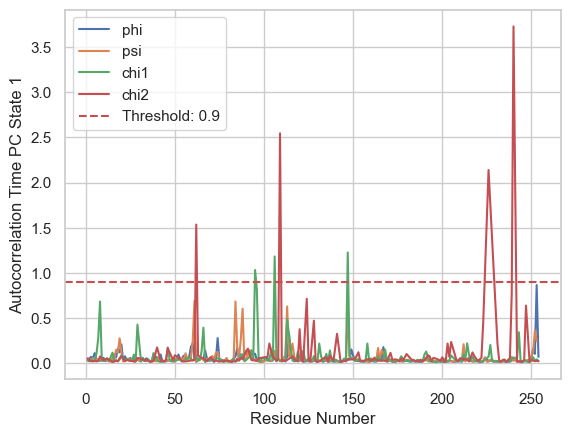

In [36]:
for angle in PC_state1_auto_corr_time_dict.keys(): 
    a_corr_arr = []
    residues = list(PC_state1_auto_corr_time_dict[angle].keys())
    for residue in residues:
        a_corr_arr.append(PC_state1_auto_corr_time_dict[angle][residue])
    plt.plot(residues, a_corr_arr, label=angle)
plt.legend()
plt.xlabel('Residue Number')  
plt.ylabel('Autocorrelation Time PC State 1')  
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')  # Add a horizontal line for the threshold
plt.legend()
plt.show()

In [37]:
#Do this again for each PC states
PC_state2_auto_corr_time_dict = {}

# Iterate over each residue in residues array
for angle in dihedral_dict.keys():
    for residue in dihedral_dict[angle].keys():
        # Get dihedral data for the current angle and residue, and slice using PC_state1_indices
        dihedral_data = dihedral_dict[angle][residue]
        dihedral_data_pc_state2 = dihedral_data[PC_state2_indices]
        
        # Calculate autocorrelation for each dihedral angle
        angle_acf = autocorr1(dihedral_data_pc_state2, lags)
        
        # Check if the values in angle_acf[:2] are positive and non-zero
        if np.all(angle_acf[:2] > 0):
            # Define a linear function for regression
            def linear_func(t, m, c):
                return m * t + c

            # Perform linear regression for each autocorrelation curve using the first two lag values
            linfit_angle, _ = curve_fit(linear_func, time[lags[:2]], np.log(angle_acf[:2]))

            # Print the slopes
            correlation_time = -1 / linfit_angle[0]
            print(f"Autocorrelation time for {angle} at residue {residue}: {correlation_time}")
            
            # Add the calculated value to the dictionary
            if angle not in PC_state2_auto_corr_time_dict:
                PC_state2_auto_corr_time_dict[angle] = {}
            PC_state2_auto_corr_time_dict[angle][residue] = correlation_time

# Print the resulting dictionary for verification
print(PC_state2_auto_corr_time_dict)

C:\Users\grace\AppData\Local\Temp\ipykernel_12596\55895275.py:21: OptimizeWarning: Covariance of the parameters could not be estimated
  linfit_angle, _ = curve_fit(linear_func, time[lags[:2]], np.log(angle_acf[:2]))


Autocorrelation time for phi at residue 2: 0.05811730285631354
Autocorrelation time for phi at residue 3: 0.1009689612948181
Autocorrelation time for phi at residue 4: 0.04057057172281654
Autocorrelation time for phi at residue 5: 0.11999242332958533
Autocorrelation time for phi at residue 6: 0.042517919712411235
Autocorrelation time for phi at residue 7: 0.027396618231889453
Autocorrelation time for phi at residue 8: 0.026404268476927433
Autocorrelation time for phi at residue 9: 0.036274676911671834
Autocorrelation time for phi at residue 10: 0.051808078794256925
Autocorrelation time for phi at residue 11: 0.02559537104377478
Autocorrelation time for phi at residue 12: 0.040662193725927956
Autocorrelation time for phi at residue 13: 0.02752937142781569
Autocorrelation time for phi at residue 14: 0.01251216400820752
Autocorrelation time for phi at residue 15: 0.034512417722929234
Autocorrelation time for phi at residue 16: 0.06823786164902275
Autocorrelation time for phi at residue 17

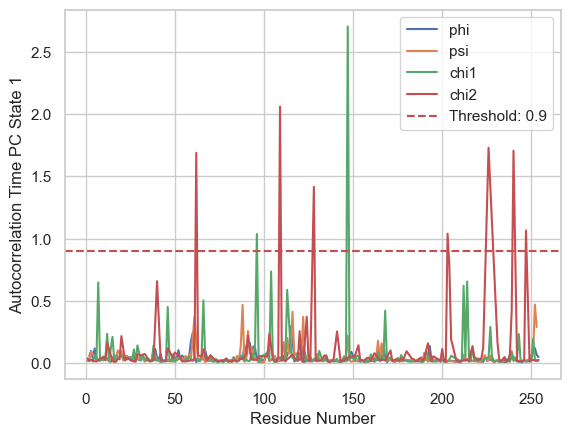

In [38]:
for angle in PC_state2_auto_corr_time_dict.keys(): 
    a_corr_arr = []
    residues = list(PC_state2_auto_corr_time_dict[angle].keys())
    for residue in residues:
        a_corr_arr.append(PC_state2_auto_corr_time_dict[angle][residue])
    plt.plot(residues, a_corr_arr, label=angle)
plt.legend()
plt.xlabel('Residue Number')  
plt.ylabel('Autocorrelation Time PC State 1')  
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')  # Add a horizontal line for the threshold
plt.legend()
plt.show()

Identify trends in dihedral angles across frames for residues of interest.

Residue LEU3 (Index 2)


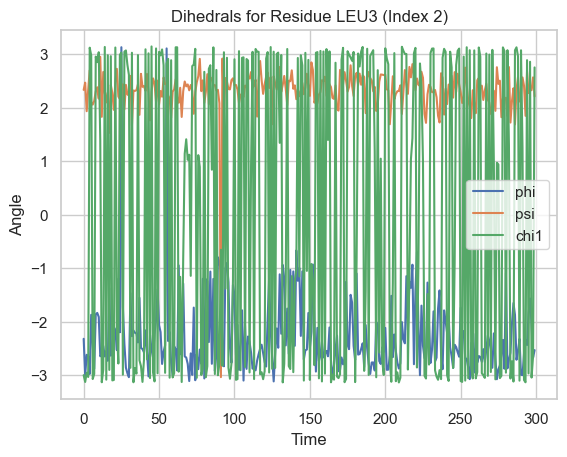

Residue LEU5 (Index 4)


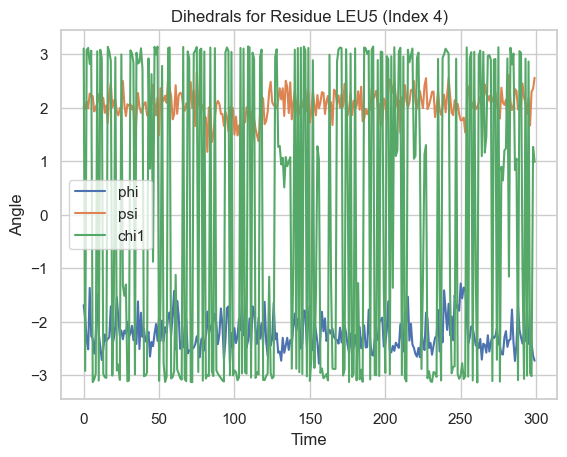

Residue ILE8 (Index 7)


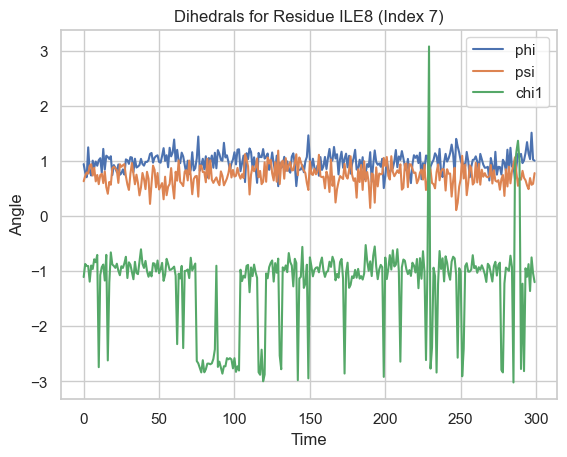

Residue TYR11 (Index 10)


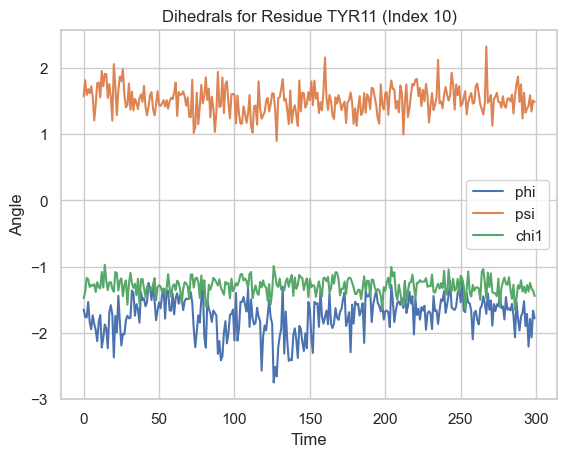

Residue HIS66 (Index 65)


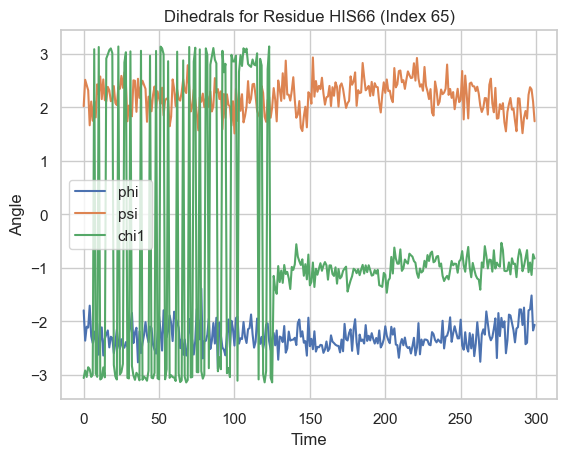

Residue TYR128 (Index 127)


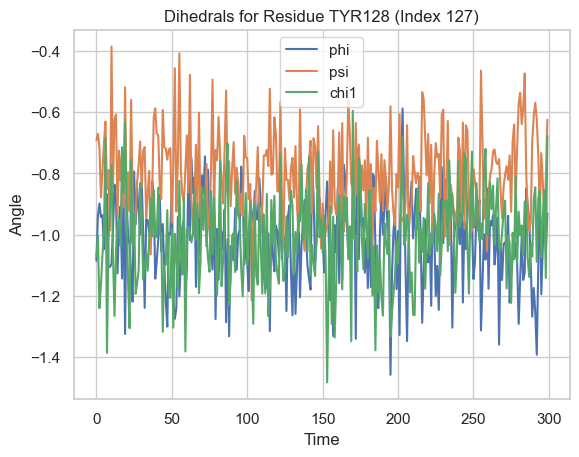

Residue TRP167 (Index 166)


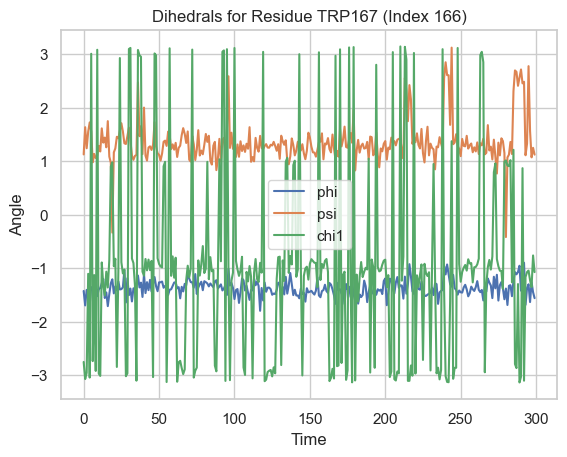

Residue ILE201 (Index 200)


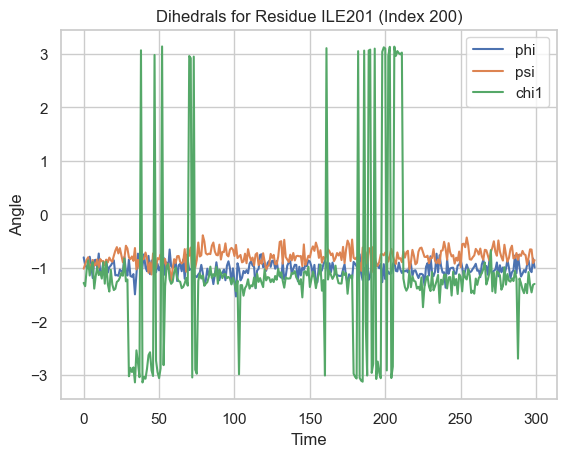

Residue ARG202 (Index 201)


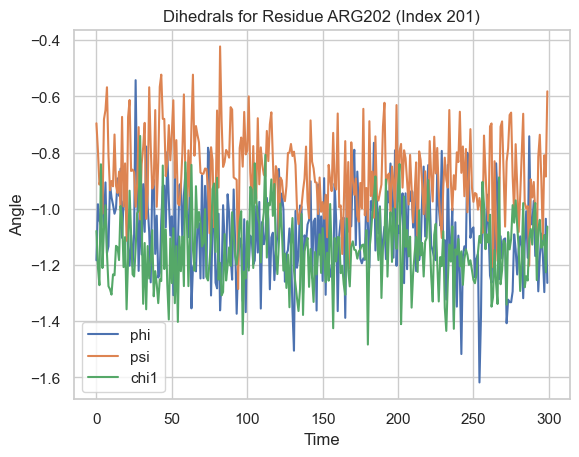

Residue GLU63 (Index 62)


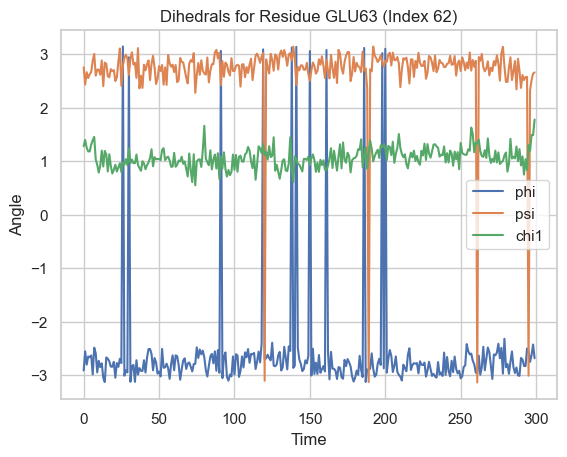

In [39]:
# Function to get residue name and sequence number
def get_residue_info(residue_index, topology):
    residue = topology.residue(residue_index)
    return residue.name, residue.resSeq

for res in res_interest:
    resname, resnum = get_residue_info(res, trj.topology)
    print(f"Residue {resname}{resnum} (Index {res})")
    
    plt.plot(time[::20], dihedral_dict['phi'][res][::20], label="phi")
    plt.plot(time[::20], dihedral_dict['psi'][res][::20], label="psi")
    plt.plot(time[::20], dihedral_dict['chi1'][res][::20], label="chi1")

    plt.xlabel('Time')
    plt.ylabel('Angle')
    plt.title(f'Dihedrals for Residue {resname}{resnum} (Index {res})')
    plt.legend()
    plt.show()

Plot RMSD vs delta G. This is not very informative since there are minimal shifts in RMSD.

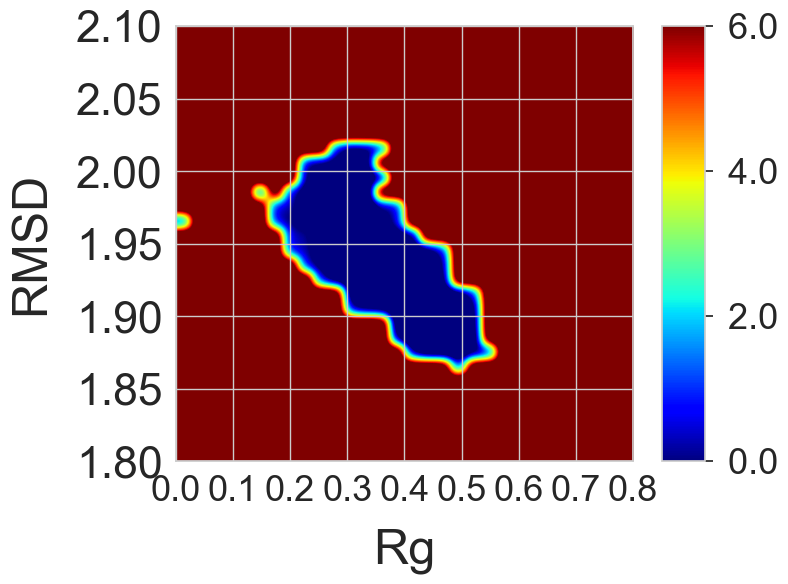

In [40]:
dG,xedges,yedges=free_energy(rg, rmsd, 300, 1.8, 2.1, 0, 0.8)

fig = plt.figure(figsize=(8, 6))
#im = plt.imshow(dG, extent=[
#                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0,2,4,6]
#plt.xlim(-25,35)
cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.ylabel("RMSD", size=35, labelpad=15)
plt.xlabel("Rg", size=35, labelpad=15)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xticks(size='26')
plt.yticks(size='32')
plt.axes(cb.ax)
plt.clim(vmin=0, vmax=6.0)
plt.yticks(size='26')
plt.tight_layout()

In [41]:
#Here I am defining all the functions for my block errors
import pyblock
from itertools import chain
def histo_blockerror(a, x0, xmax, bins, blocks):
    histo, xedges = np.histogram(
        a, bins=bins, range=[x0, xmax], density=True, weights=None)
    xcenters = xedges[:-1] + np.diff(xedges)/2
    Ind = chunkIt(len(a), blocks)
    block_size = (Ind[0][1]-Ind[0][0])
    hist_blocks = []
    for i in range(0, len(Ind)):
        block_data = a[Ind[i][0]:Ind[i][1]]
        hist, binedges = np.histogram(block_data, bins=bins, range=[
                                      x0, xmax], density=True, weights=None)
        hist_blocks.append(hist)
    hist_blocks = np.array(hist_blocks)
    average = np.average(hist_blocks, axis=0)
    variance = np.var(hist_blocks, axis=0)
    N = len(hist_blocks)
    error = np.sqrt(variance / N)
    return average, xcenters, error

def chunkIt(a, num):
    avg = a / float(num)
    out = []
    last = 0.0
    while last < a-1:
        out.append([int(last), int(last+avg)])
        last += avg
    return out


def free_energy_1D_blockerror(a, T, x0, xmax, bins, blocks):
    histo, xedges = np.histogram(
        a, bins=bins, range=[x0, xmax], density=True, weights=None)
    max = np.max(histo)
    # free_energy=-(0.001987*T)*np.log(histo)
    free_energy = -(0.001987*T)*np.log(histo+.000001)
    free_energy = free_energy-np.min(free_energy)
    xcenters = xedges[:-1] + np.diff(xedges)/2
    Ind = chunkIt(len(a), blocks)
    block_size = (Ind[0][1]-Ind[0][0])
    hist_blocks = []
    for i in range(0, len(Ind)):
        block_data = a[Ind[i][0]:Ind[i][1]]
        hist, binedges = np.histogram(block_data, bins=bins, range=[
                                      x0, xmax], density=True, weights=None)
        hist_blocks.append(hist)
    hist_blocks = np.array(hist_blocks)
    average = np.average(hist_blocks, axis=0)
    variance = np.var(hist_blocks, axis=0)
    N = len(hist_blocks)
    error = np.sqrt(variance / N)
    ferr = -(0.001987*T)*(error / average)
    return free_energy, xcenters, ferr

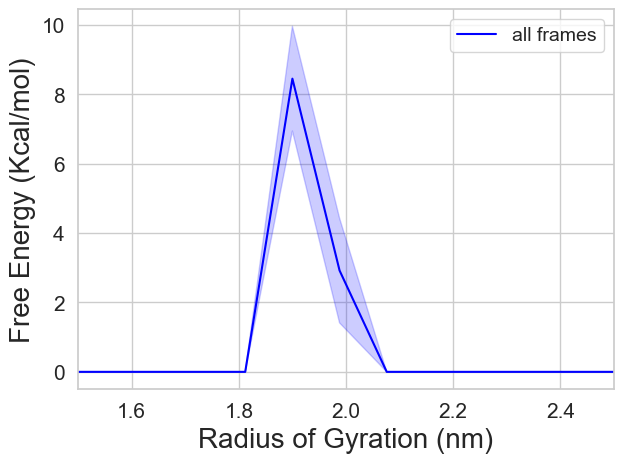

In [42]:
Rg_all, edges, u_err = histo_blockerror(rg, 0.8, 3.0, 25, 5)

plt.plot(edges, Rg_all, c='blue', label='all frames')
plt.fill_between(edges, Rg_all-u_err, Rg_all+u_err, color='blue', alpha=0.2)

plt.xlim(1.5, 2.5)
plt.xlabel('Radius of Gyration (nm)', size=20)
plt.ylabel('Free Energy (Kcal/mol)', size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(size='15')
plt.yticks(size='15')
plt.tight_layout()
plt.legend(loc='upper right', fontsize=14)
plt.tight_layout()
plt.show()

Plot Rg as a funciton of delta G. Get a sense for relative structural flexibility and stability across protein- ligand complexes.

C:\Users\grace\AppData\Local\Temp\ipykernel_21368\3111160101.py:54: RuntimeWarning: invalid value encountered in divide
  ferr = -(0.001987*T)*(error / average)


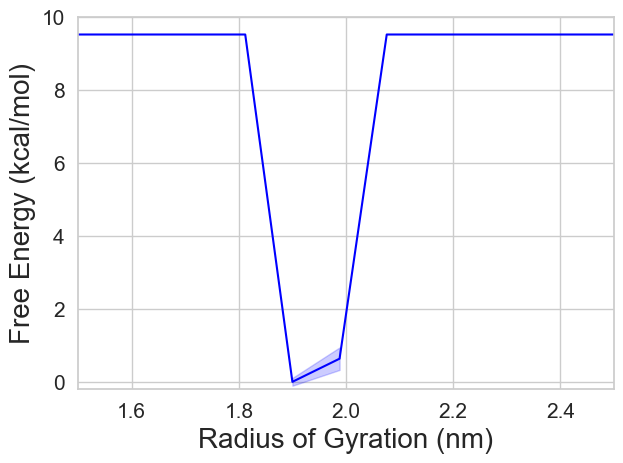

In [61]:
dG, bin_centers, ferr = free_energy_1D_blockerror(rg, 300, 0.8, 3.0, 25, 5)
sns.lineplot(x=bin_centers, y=dG, color='blue')
plt.fill_between(bin_centers, dG-ferr, dG+ferr, color='blue', alpha=0.2)
plt.ylim(-0.2, 10)
plt.xlim(1.5, 2.5)
plt.xlabel('Radius of Gyration (nm)', size=20)
plt.ylabel('Free Energy (kcal/mol)', size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(size='15')
plt.yticks(size='15')
plt.tight_layout()
np.savetxt(outdir+'RegA_DKA_rg.dG.err.dat', np.column_stack((bin_centers, dG, ferr)))
plt.tight_layout()
plt.savefig('%s/Rg.dG.pdf' % outdir)
plt.show()